In [1]:
import pandas as pd
import numpy as np
import numpy as snp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from datetime import datetime

In [2]:
train_df = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\제주 특산물\train.csv')
test_df = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\제주 특산물\test.csv')

international = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\제주 특산물\international_trade.csv')

- TG: 감귤
- BC: 브로콜리
- RD: 무
- CR: 당근
- CB: 양배추
- corporation : 법인 A부터 F 존재
- location : 지역코드
- J : 제주도 제주시
- S : 제주도 서귀포시
- supply(kg) : 유통된 물량, kg 단위
- price(원/kg) : 유통된 품목들의 kg 마다의 가격, 원 단위

In [3]:
international = international.rename(columns={
    '기간': 'Period',
    '품목명': 'item',
    '수출 중량': 'Export Weight',
    '수출 금액': 'Export Value',
    '수입 중량': 'Import Weight',
    '수입 금액': 'Import Value',
    '무역수지': 'Trade Balance'
})

international

Period                             item  Export Weight  Export Value  \
0     2019-01        토마토(신선한 것이나 냉장한 것으로 한정한다)         356571           990   
1     2019-01                               양파         821330           222   
2     2019-01                               쪽파             60             1   
3     2019-01             꽃양배추와 브로콜리(broccoli)            160             1   
4     2019-01                        방울다다기 양배추              0             0   
...       ...                              ...            ...           ...   
1269  2023-02           포포(papaw)[파파야(papaya)]              0             0   
1270  2023-02                               사과         135165           351   
1271  2023-02                                배        2206012          5411   
1272  2023-02  신 체리[프루너스 체라서스(Prunus cerasus)]              5             0   
1273  2023-02                               자두              0             0   

      Import Weight  Import Value  Trade Balance  
0                 0             0            990  
1           4003206          1118           -896  
2             93405           128           -127  
3            638913           563           -562  
4              7580            38            -38  
...             ...           ...            ...  
1269          23830            71            -71  
1270              0             0            351  
1271              1             0           5411  
1272              0             0              0  
1273              2             0              0  

[1274 rows x 7 columns]

In [4]:
international['item'].unique()

array(['토마토(신선한 것이나 냉장한 것으로 한정한다)', '양파', '쪽파', '꽃양배추와 브로콜리(broccoli)',
       '방울다다기 양배추', '양배추', '결구(結球) 상추',
       '위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]',
       '당근', '오이류(신선한 것이나 냉장한 것으로 한정한다)',
       '콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]', '대추야자', '무화과', '파인애플',
       '망고(mango)', '망고스틴(mangosteen)', '오렌지', '감귤',
       '그레이프프루트(grapefruit)와 포멜로(pomelo)',
       '레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]', '수박',
       '포포(papaw)[파파야(papaya)]', '사과', '배', '자두',
       '완두[피섬 새티범(Pisum sativum)]', '구아바(guava)', '살구',
       '신 체리[프루너스 체라서스(Prunus cerasus)]', '복숭아[넥터린(nectarine)을 포함한다]',
       '순무', '방울토마토', '샬롯(shallot)', '참외'], dtype=object)

In [5]:
selected_items = international[international['item'].str.contains('감귤|브로콜리|순무|당근|양배추')].copy()

selected_items['item'] = selected_items['item'].replace({
    '감귤': 'TG',
    '브로콜리': 'BC',
    '순무': 'RD',
    '당근': 'CR',
    '양배추': 'CB'
}, regex = True)

selected_items['item'] = selected_items['item'].str.replace('.*감귤.*', 'TG')
selected_items['item'] = selected_items['item'].str.replace('.*브로콜리.*', 'BC')
selected_items['item'] = selected_items['item'].str.replace('.*무.*', 'RD')
selected_items['item'] = selected_items['item'].str.replace('.*당근.*', 'CR')
selected_items['item'] = selected_items['item'].str.replace('.*양배추.*', 'CB')


selected_items

Period               item  Export Weight  Export Value  Import Weight  \
3     2019-01  꽃CB와 BC(broccoli)            160             1         638913   
4     2019-01           방울다다기 CB              0             0           7580   
5     2019-01                 CB         184650            94         395802   
8     2019-01                 CR          23150            22        7466150   
17    2019-01                 TG          58368           172              0   
...       ...                ...            ...           ...            ...   
1249  2023-02           방울다다기 CB             71             1          10362   
1250  2023-02                 CB          13188            13         377456   
1253  2023-02                 CR          22510            20        9260020   
1254  2023-02                 RD           4000             4              2   
1264  2023-02                 TG           6895            34          27765   

      Import Value  Trade Balance  
3              563           -562  
4               38            -38  
5               90              4  
8             2955          -2934  
17               0            172  
...            ...            ...  
1249            55            -55  
1250           104            -91  
1253          3758          -3737  
1254             0              4  
1264            98            -64  

[256 rows x 7 columns]

In [6]:
# train_df = pd.merge(train_df, selected_items, on = 'item', how = 'left')
# test_df = pd.merge(test_df, selected_items, on = 'item', how = 'left')

In [7]:
# 공휴일
holi_weekday = ['2019-01-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-03-01', '2019-05-05', '2019-05-12', '2019-06-06', '2019-08-15', '2019-09-12', '2019-09-13', '2019-09-14', '2019-10-03', '2019-10-09', '2019-12-25',
                '2020-01-01' ,'2020-01-24' ,'2020-01-25', '2020-01-26', '2020-03-01', '2020-04-30', '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25',
                '2021-01-01' ,'2021-02-11' ,'2021-02-12', '2021-02-13', '2021-03-01', '2021-05-05', '2021-05-19', '2021-06-06', '2021-08-15', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-03', '2021-10-09', '2021-12-25',
                '2022-01-01' ,'2022-01-31' ,'2022-02-01', '2022-02-02', '2022-03-01', '2022-05-05', '2022-05-08', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2020-10-10', '2022-12-25',
                '2023-01-01' ,'2023-01-21' ,'2023-01-22', '2023-01-23', '2023-01-24', '2023-03-01']

In [8]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month
train_df['day'] = train_df['timestamp'].dt.day
train_df['day_of_week'] = train_df['timestamp'].dt.dayofweek
train_df['sin_month'] = np.sin(2 * np.pi * train_df['month'] / 12)
train_df['cos_month'] = np.cos(2 * np.pi * train_df['month'] / 12)
train_df['sin_date'] = np.sin(2 * np.pi * (train_df['month'] + train_df['day'] / 31) / 12)
train_df['cos_date'] = np.cos(2 * np.pi * (train_df['month'] + train_df['day'] / 31) / 12)
train_df['sin_dayofweek'] = np.sin(2 * np.pi * (train_df['day_of_week'] + 1) / 7)
train_df['cos_dayofweek'] = np.cos(2 * np.pi * (train_df['day_of_week'] + 1) / 7)
train_df['holiday'] = np.where((train_df.day_of_week >= 5) | (train_df.timestamp.dt.strftime('%Y-%m-%d').isin(holi_weekday)), 1, 0)

test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month
test_df['day'] = test_df['timestamp'].dt.day
test_df['day_of_week'] = test_df['timestamp'].dt.dayofweek
test_df['sin_month'] = np.sin(2 * np.pi * test_df['month'] / 12)
test_df['cos_month'] = np.cos(2 * np.pi * test_df['month'] / 12)
test_df['sin_date'] = np.sin(2 * np.pi * (test_df['month'] + test_df['day'] / 31) / 12)
test_df['cos_date'] = np.cos(2 * np.pi * (test_df['month'] + test_df['day'] / 31) / 12)
test_df['sin_dayofweek'] = np.sin(2 * np.pi * (test_df['day_of_week'] + 1) / 7)
test_df['cos_dayofweek'] = np.cos(2 * np.pi * (test_df['day_of_week'] + 1) / 7)
test_df['holiday'] = np.where((test_df.day_of_week >= 5) | (test_df.timestamp.dt.strftime('%Y-%m-%d').isin(holi_weekday)), 1, 0)

In [9]:
# month_mean 계산
price_month_mean = pd.pivot_table(train_df, values = 'price(원/kg)', index = ['corporation', 'month'], aggfunc = np.mean).reset_index()
price_month_mean.columns = ['corporation', 'month', 'month_mean']

# month_std 계산
price_month_std = pd.pivot_table(train_df, values = 'price(원/kg)', index = ['corporation', 'month'], aggfunc = np.std).reset_index()
price_month_std.columns = ['corporation', 'month', 'month_std']

train_df = train_df.merge(price_month_mean, on = ['corporation', 'month'], how = 'left')
test_df = test_df.merge(price_month_mean, on = ['corporation', 'month'], how = 'left')

train_df = train_df.merge(price_month_std, on = ['corporation', 'month'], how = 'left')
test_df = test_df.merge(price_month_std, on = ['corporation', 'month'], how = 'left')

train_df = train_df.reset_index(drop = True)

In [10]:
# 품목별 평균 가격 계산
item_mean_price = train_df.groupby('item')['price(원/kg)'].mean().reset_index()
item_mean_price.columns = ['item', 'item_mean_price']

train_df = train_df.merge(item_mean_price, on='item', how='left')
test_df = test_df.merge(item_mean_price, on='item', how='left')

# 법인별 평균 가격 계산
corp_mean_price = train_df.groupby('corporation')['price(원/kg)'].mean().reset_index()
corp_mean_price.columns = ['corporation', 'corp_mean_price']

train_df = train_df.merge(corp_mean_price, on='corporation', how='left')
test_df = test_df.merge(corp_mean_price, on='corporation', how='left')

# 지역별 평균 가격 계산
location_mean_price = train_df.groupby('location')['price(원/kg)'].mean().reset_index()
location_mean_price.columns = ['location', 'location_mean_price']

train_df = train_df.merge(location_mean_price, on='location', how='left')
test_df = test_df.merge(location_mean_price, on='location', how='left')

In [11]:
train_df

ID  timestamp item corporation location  supply(kg)  \
0      TG_A_J_20190101 2019-01-01   TG           A        J         0.0   
1      TG_A_J_20190102 2019-01-02   TG           A        J         0.0   
2      TG_A_J_20190103 2019-01-03   TG           A        J     60601.0   
3      TG_A_J_20190104 2019-01-04   TG           A        J     25000.0   
4      TG_A_J_20190105 2019-01-05   TG           A        J     32352.0   
...                ...        ...  ...         ...      ...         ...   
59392  RD_F_J_20230227 2023-02-27   RD           F        J    452440.0   
59393  RD_F_J_20230228 2023-02-28   RD           F        J    421980.0   
59394  RD_F_J_20230301 2023-03-01   RD           F        J    382980.0   
59395  RD_F_J_20230302 2023-03-02   RD           F        J    477220.0   
59396  RD_F_J_20230303 2023-03-03   RD           F        J    427520.0   

       price(원/kg)  year  month  day  ...  sin_date  cos_date  sin_dayofweek  \
0              0.0  2019      1    1  ...  0.514555  0.857457       0.974928   
1              0.0  2019      1    2  ...  0.528964  0.848644       0.433884   
2           1728.0  2019      1    3  ...  0.543222  0.839589      -0.433884   
3           1408.0  2019      1    4  ...  0.557324  0.830295      -0.974928   
4           1250.0  2019      1    5  ...  0.571268  0.820763      -0.781831   
...            ...   ...    ...  ...  ...       ...       ...            ...   
59392        468.0  2023      2   27  ...  0.997719  0.067510       0.781831   
59393        531.0  2023      2   28  ...  0.998717  0.050649       0.974928   
59394        574.0  2023      3    1  ...  0.999857 -0.016889       0.433884   
59395        523.0  2023      3    2  ...  0.999429 -0.033774      -0.433884   
59396        529.0  2023      3    3  ...  0.998717 -0.050649      -0.974928   

       cos_dayofweek  holiday   month_mean    month_std  item_mean_price  \
0          -0.222521        1  1080.705376  1189.693413      3177.442022   
1          -0.900969        0  1080.705376  1189.693413      3177.442022   
2          -0.900969        0  1080.705376  1189.693413      3177.442022   
3          -0.222521        0  1080.705376  1189.693413      3177.442022   
4           0.623490        1  1080.705376  1189.693413      3177.442022   
...              ...      ...          ...          ...              ...   
59392       0.623490        0   430.343972   283.201949       187.073539   
59393      -0.222521        0   430.343972   283.201949       187.073539   
59394      -0.900969        1   455.003937   305.858185       187.073539   
59395      -0.900969        0   455.003937   305.858185       187.073539   
59396      -0.222521        0   455.003937   305.858185       187.073539   

       corp_mean_price  location_mean_price  
0          1141.704458           1062.35148  
1          1141.704458           1062.35148  
2          1141.704458           1062.35148  
3          1141.704458           1062.35148  
4          1141.704458           1062.35148  
...                ...                  ...  
59392       259.121799           1062.35148  
59393       259.121799           1062.35148  
59394       259.121799           1062.35148  
59395       259.121799           1062.35148  
59396       259.121799           1062.35148  

[59397 rows x 23 columns]

In [12]:
train_df.item.value_counts()

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

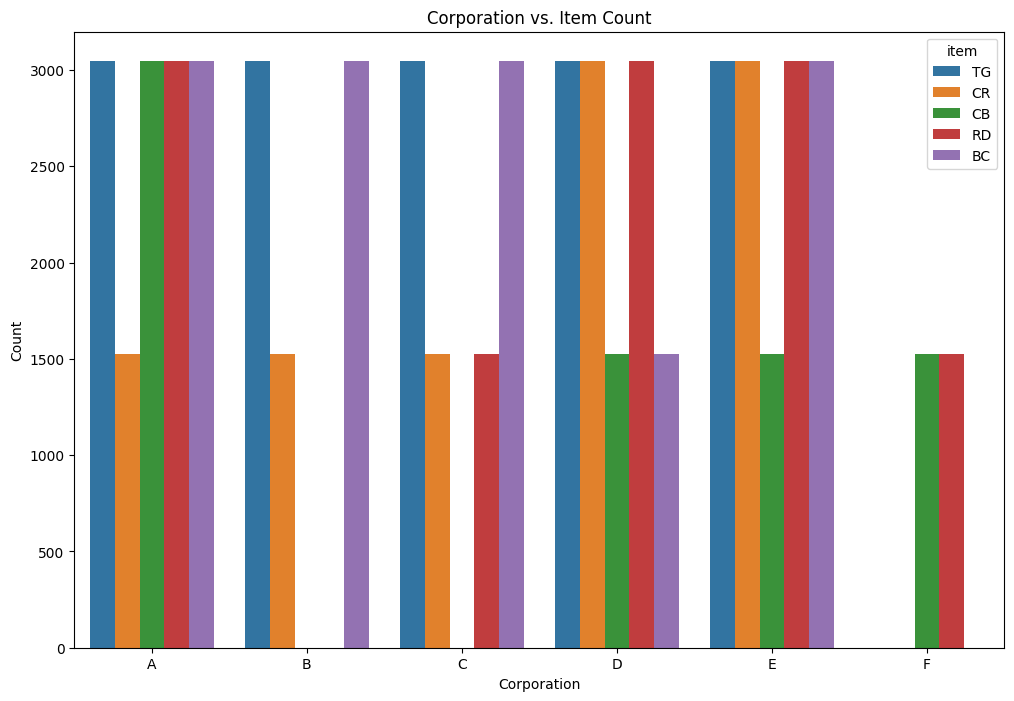

In [13]:
df_plot = train_df[['corporation', 'location', 'item']]

plt.figure(figsize=(12, 8))
sns.countplot(x='corporation', hue='item', data=df_plot, dodge=True)
plt.title('Corporation vs. Item Count')
plt.xlabel('Corporation')
plt.ylabel('Count')
plt.show()

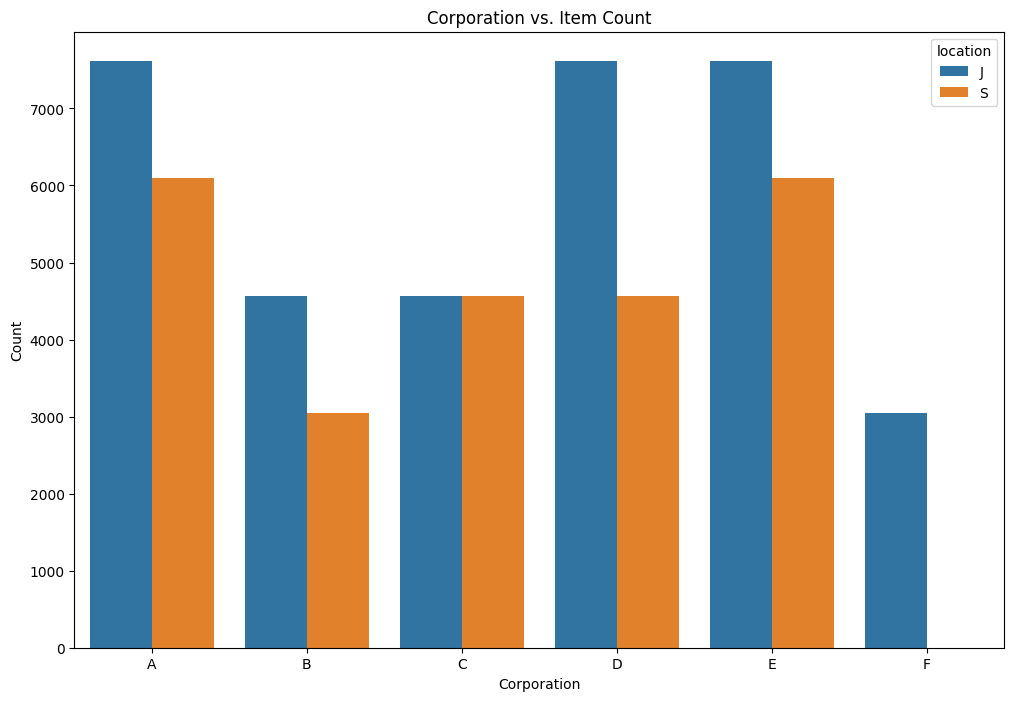

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(x='corporation', hue='location', data=df_plot, dodge=True)
plt.title('Corporation vs. Item Count')
plt.xlabel('Corporation')
plt.ylabel('Count')
plt.show()

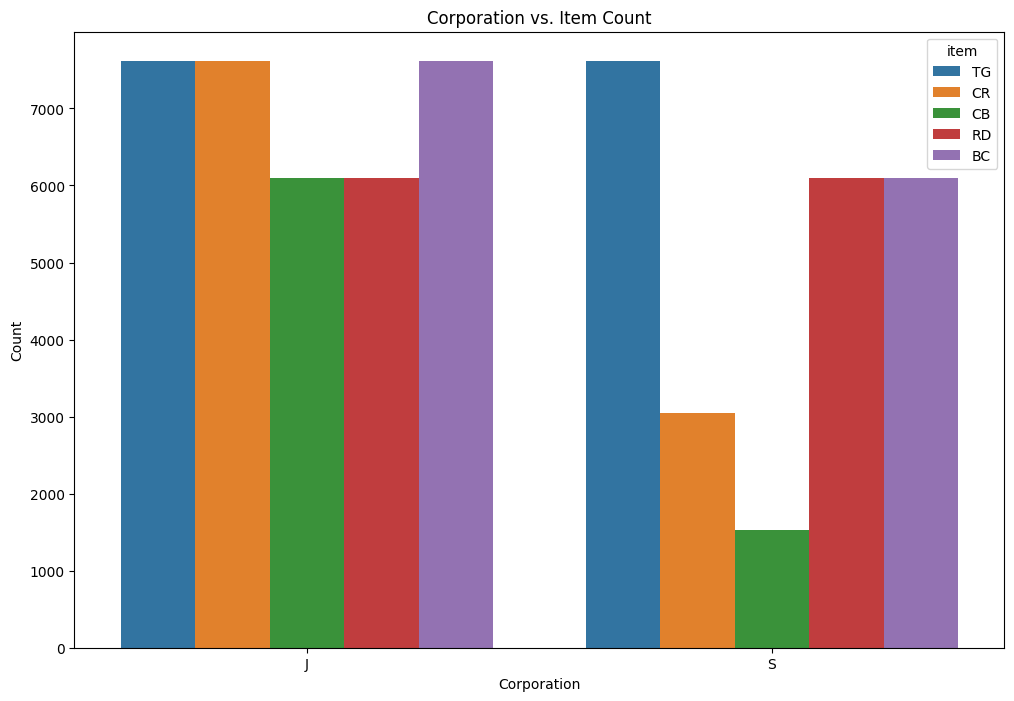

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(x='location', hue='item', data=df_plot, dodge=True)
plt.title('Corporation vs. Item Count')
plt.xlabel('Corporation')
plt.ylabel('Count')
plt.show()

C:\Users\dlwks\AppData\Local\Temp\ipykernel_19360\2741398512.py:30: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


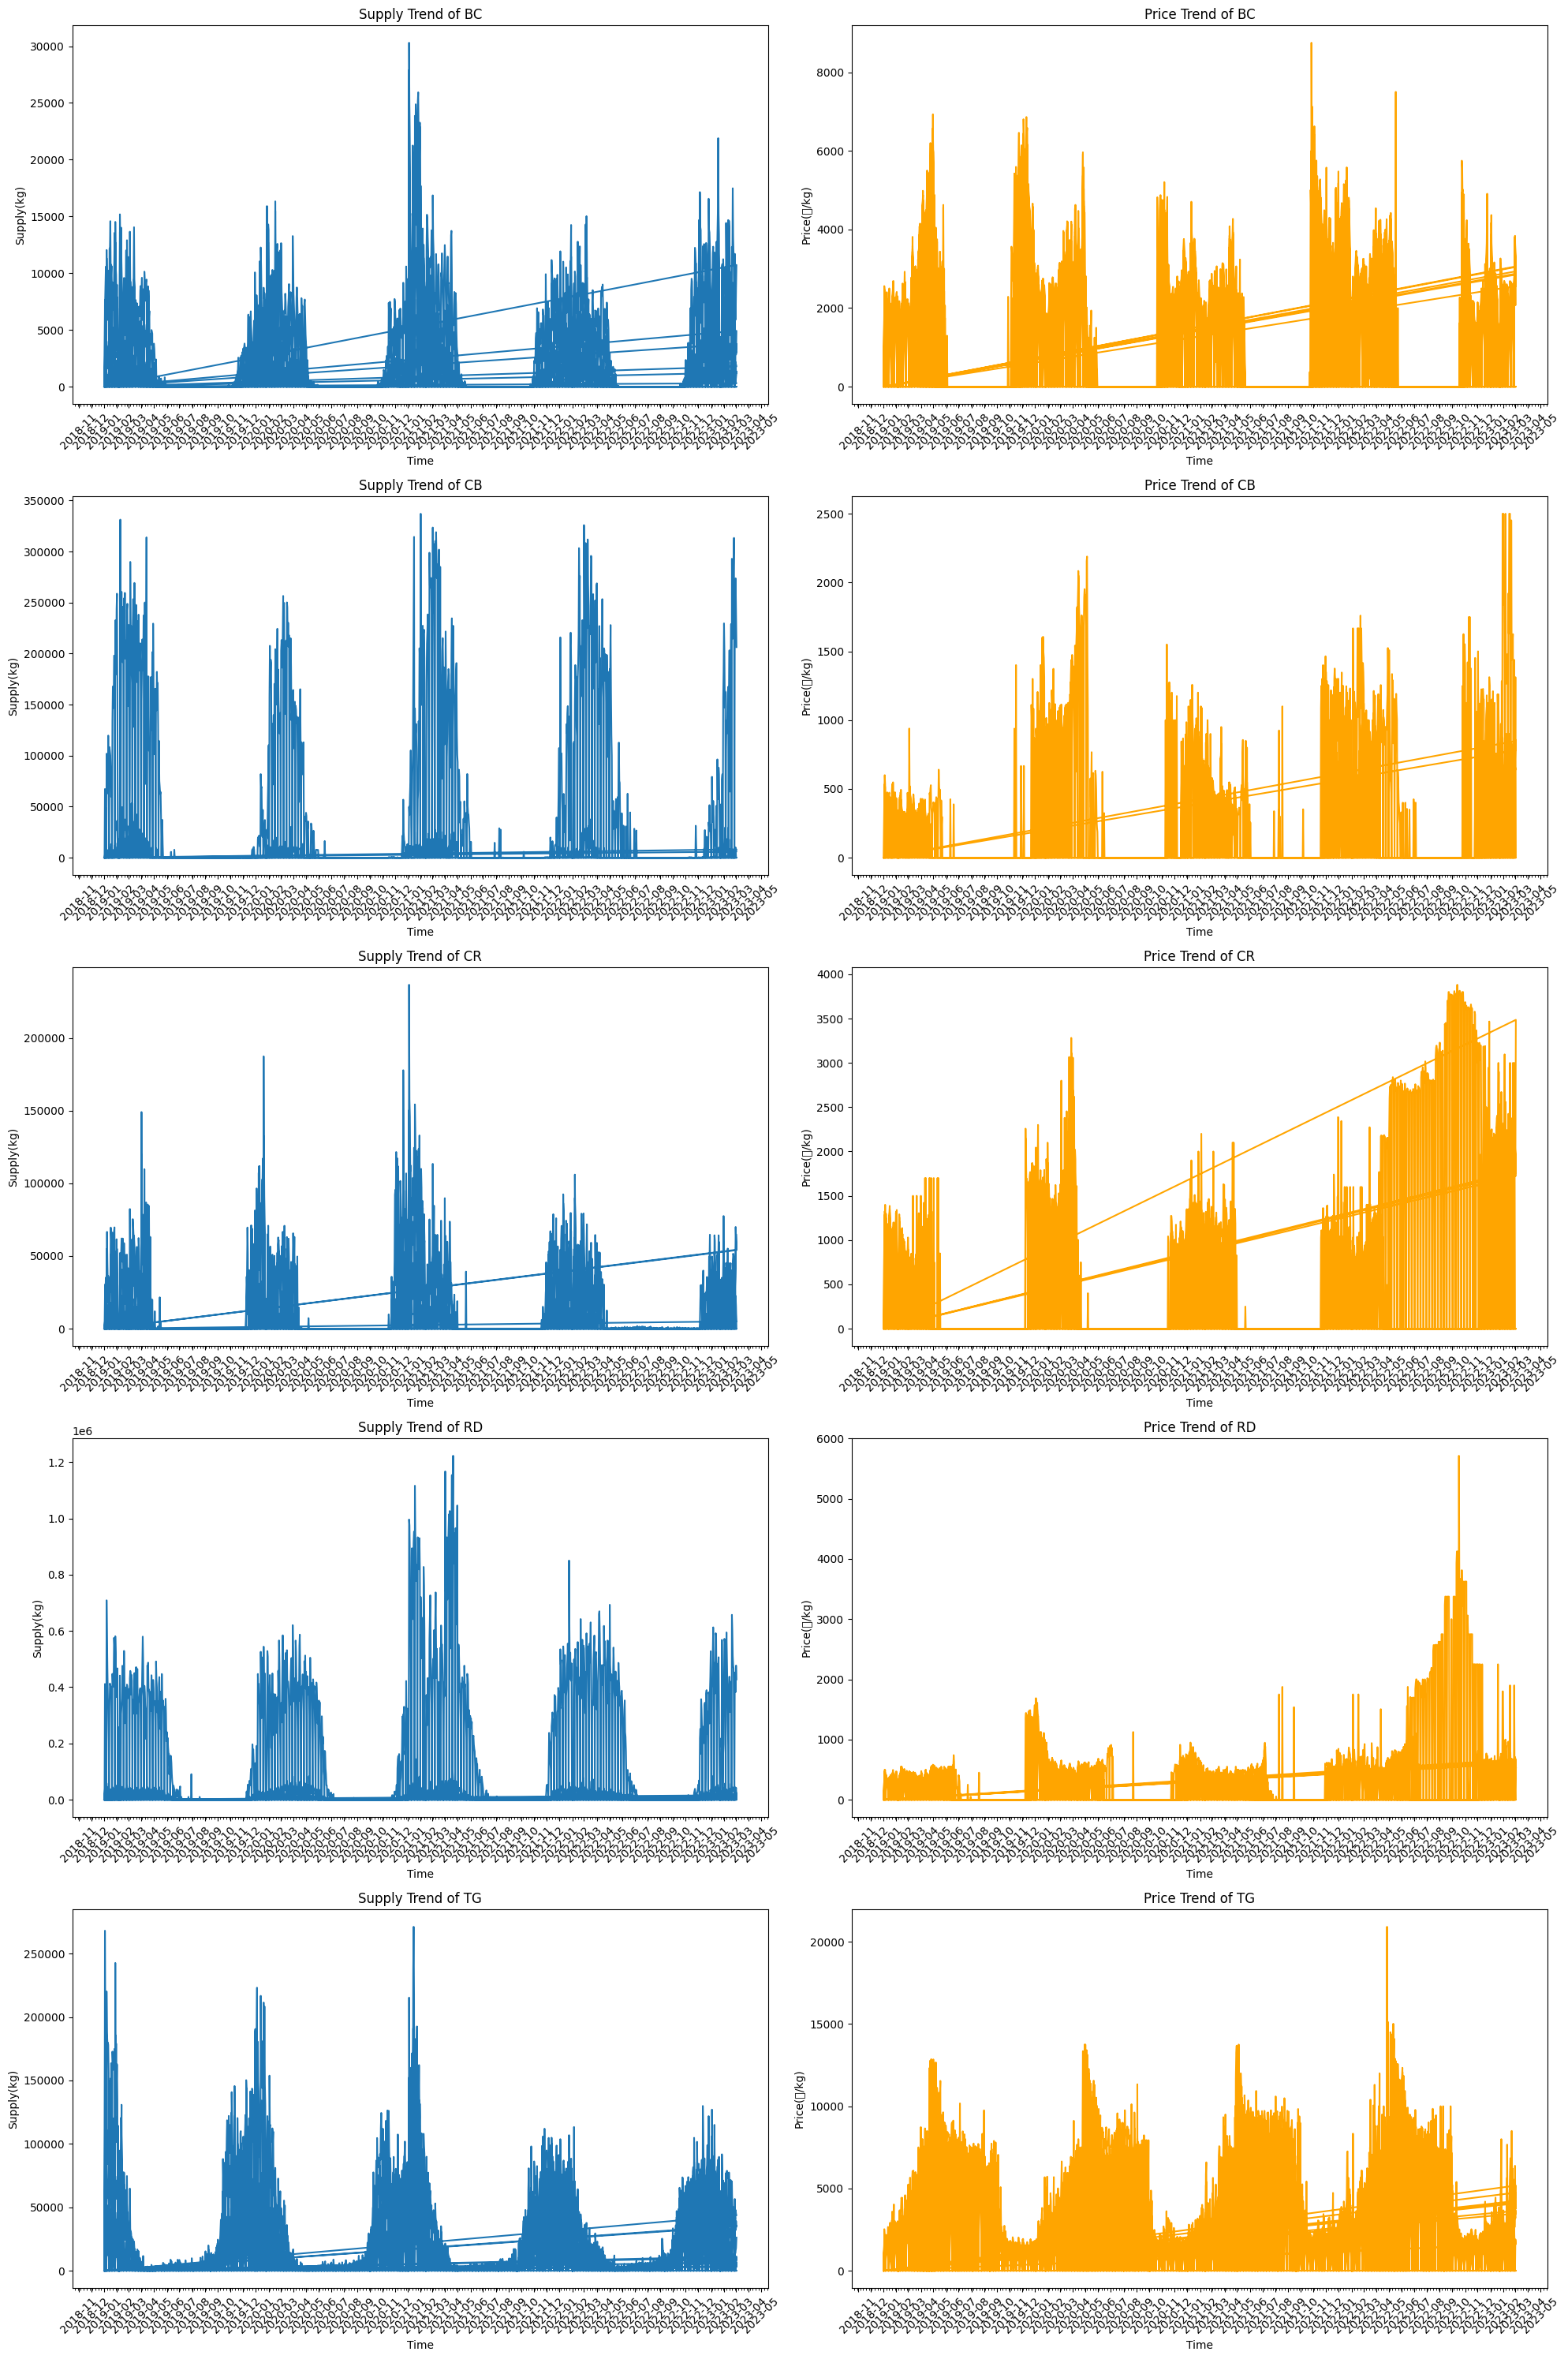

In [16]:
grouped_df = train_df.groupby('item')

# 그래프 그리기
fig, axes = plt.subplots(len(grouped_df), 2, figsize=(20, 6*len(grouped_df)))

for i, (item, group) in enumerate(grouped_df):
    # 왼쪽 그래프 (supply)
    axes[i, 0].plot(group['timestamp'], group['supply(kg)'])
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('Supply(kg)')
    axes[i, 0].set_title(f'Supply Trend of {item}')
    
    # 오른쪽 그래프 (price)
    axes[i, 1].plot(group['timestamp'], group['price(원/kg)'], color='orange')
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('Price(원/kg)')
    axes[i, 1].set_title(f'Price Trend of {item}')

    # x 축을 주 단위로 표시
    axes[i, 0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[i, 0].xaxis.set_minor_locator(mdates.WeekdayLocator())
    axes[i, 0].tick_params(axis='x', rotation=45)

    axes[i, 1].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[i, 1].xaxis.set_minor_locator(mdates.WeekdayLocator())
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\dlwks\AppData\Local\Temp\ipykernel_19360\2209123870.py:30: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


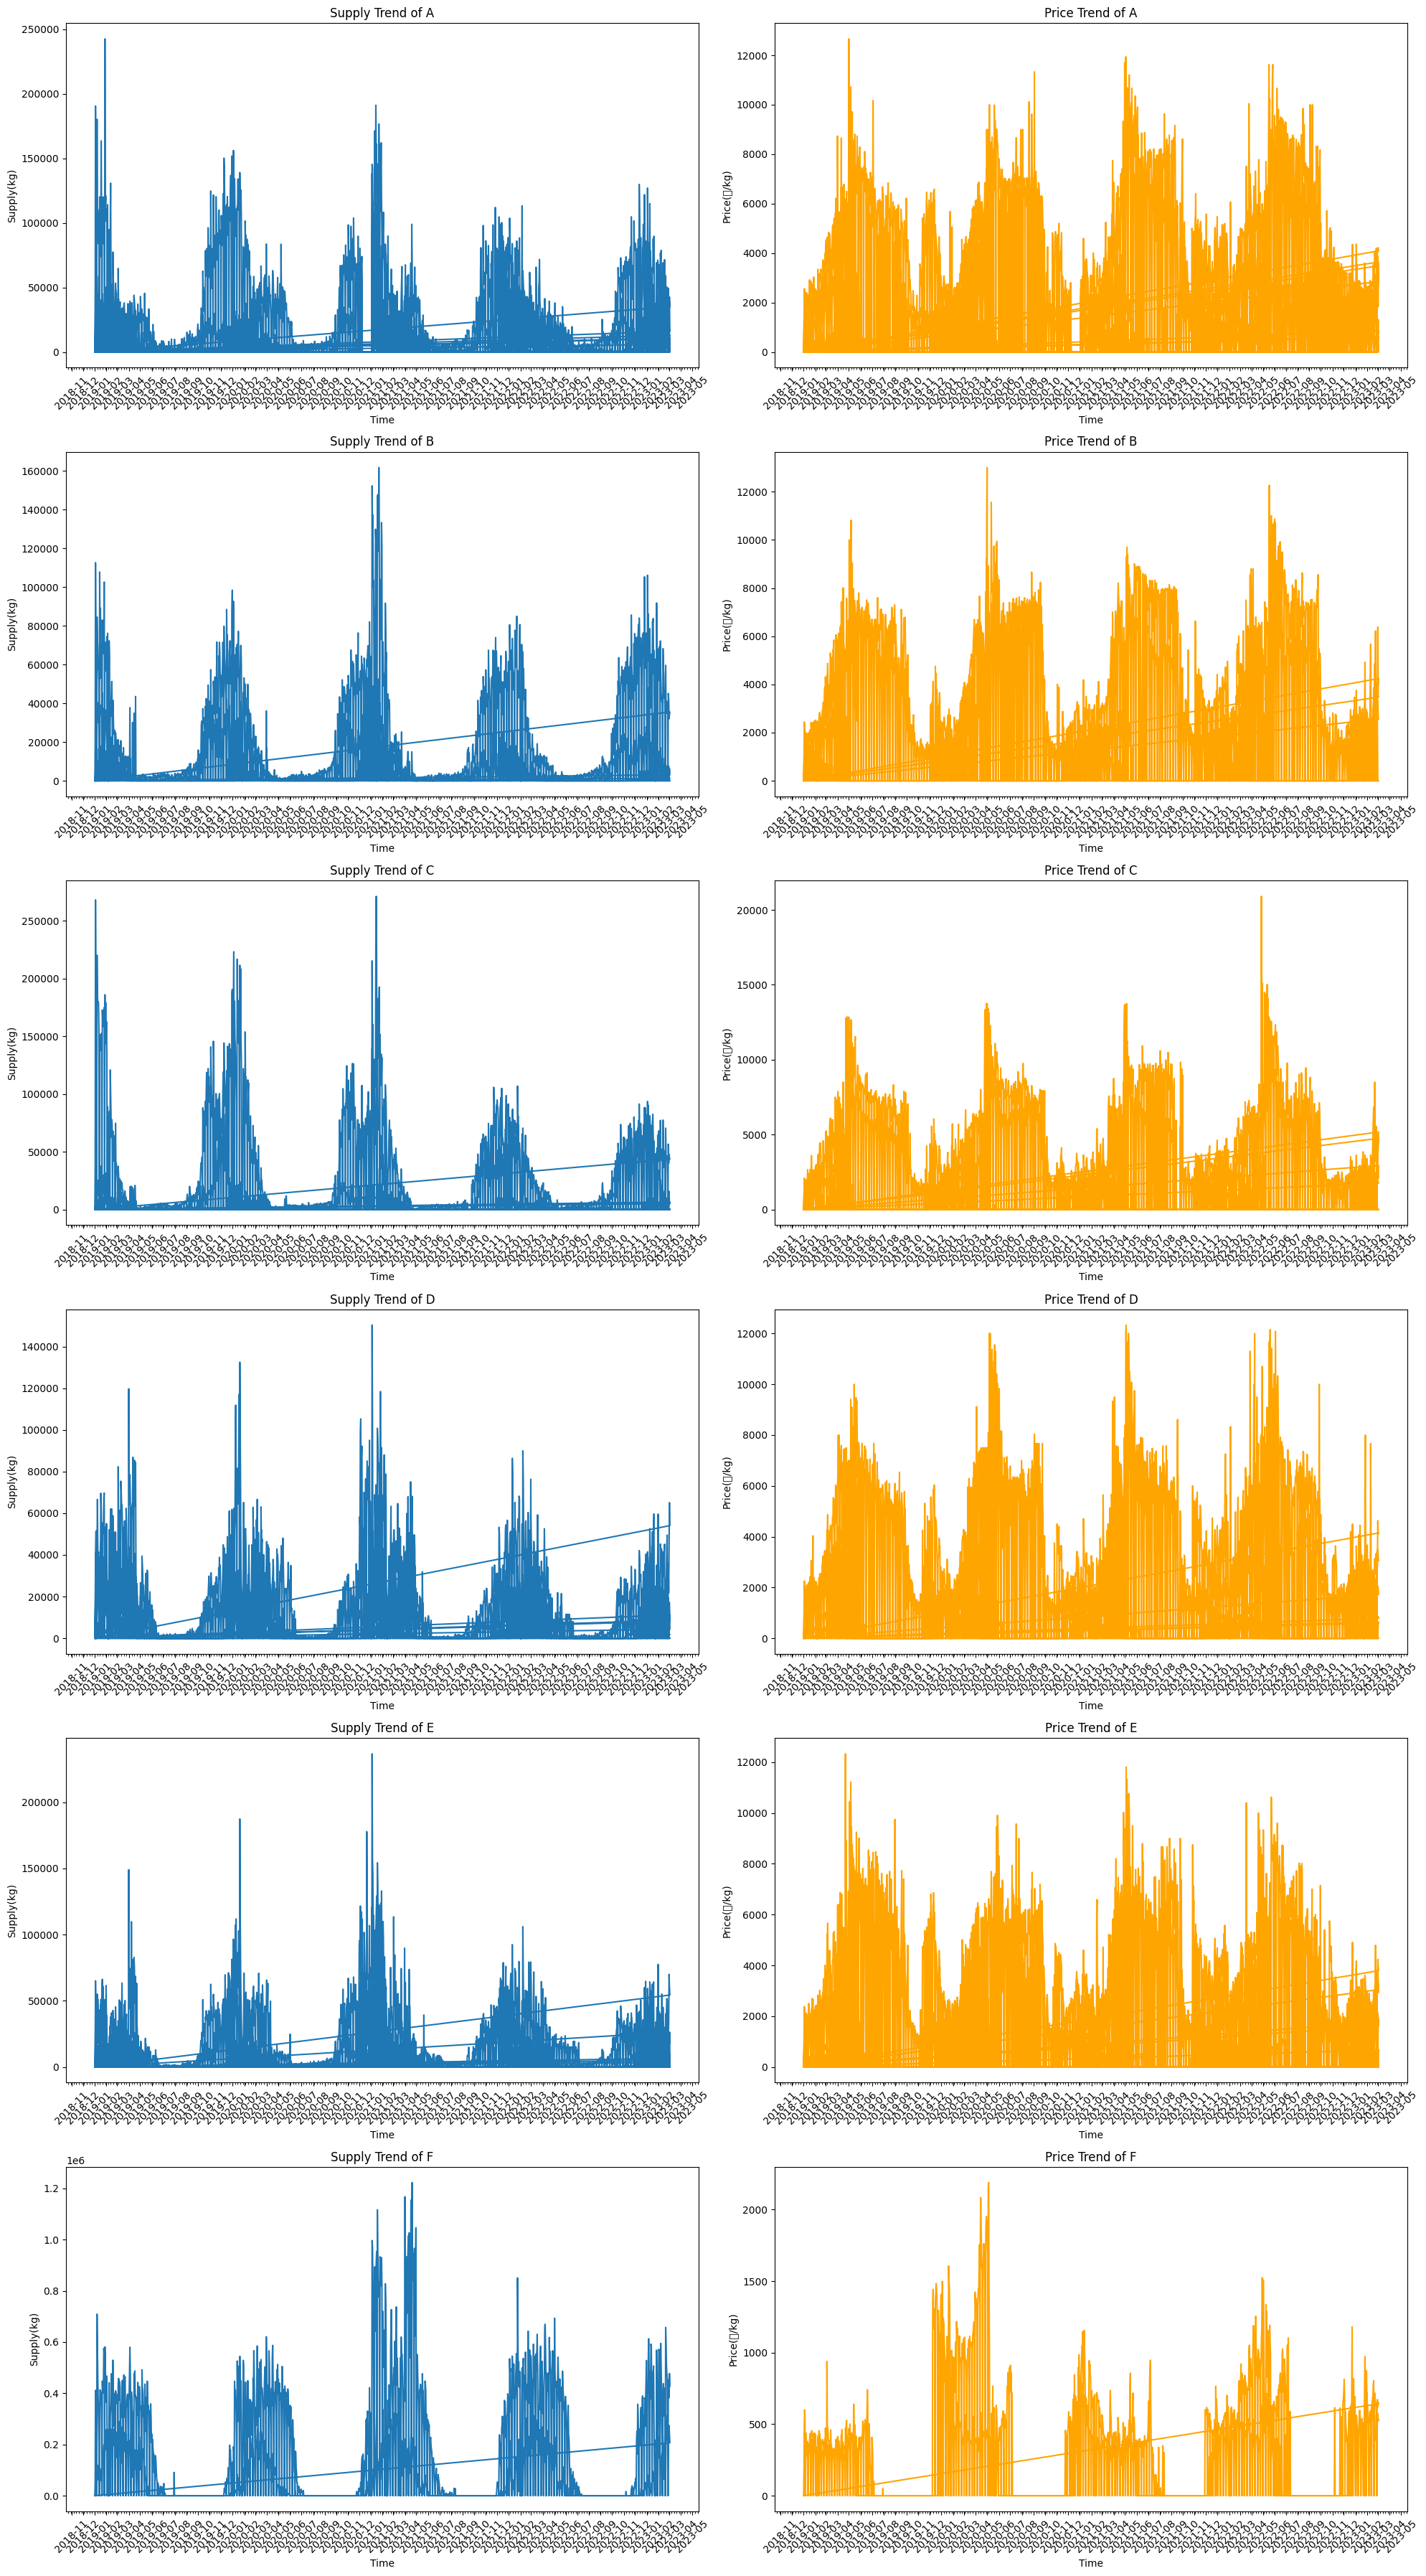

In [17]:
grouped_df = train_df.groupby('corporation')

# 그래프 그리기
fig, axes = plt.subplots(len(grouped_df), 2, figsize=(20, 6*len(grouped_df)))

for i, (corporation, group) in enumerate(grouped_df):
    # 왼쪽 그래프 (supply)
    axes[i, 0].plot(group['timestamp'], group['supply(kg)'])
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('Supply(kg)')
    axes[i, 0].set_title(f'Supply Trend of {corporation}')
    
    # 오른쪽 그래프 (price)
    axes[i, 1].plot(group['timestamp'], group['price(원/kg)'], color='orange')
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('Price(원/kg)')
    axes[i, 1].set_title(f'Price Trend of {corporation}')

    # x 축을 주 단위로 표시
    axes[i, 0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[i, 0].xaxis.set_minor_locator(mdates.WeekdayLocator())
    axes[i, 0].tick_params(axis='x', rotation=45)

    axes[i, 1].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[i, 1].xaxis.set_minor_locator(mdates.WeekdayLocator())
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\dlwks\AppData\Local\Temp\ipykernel_19360\871098511.py:30: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


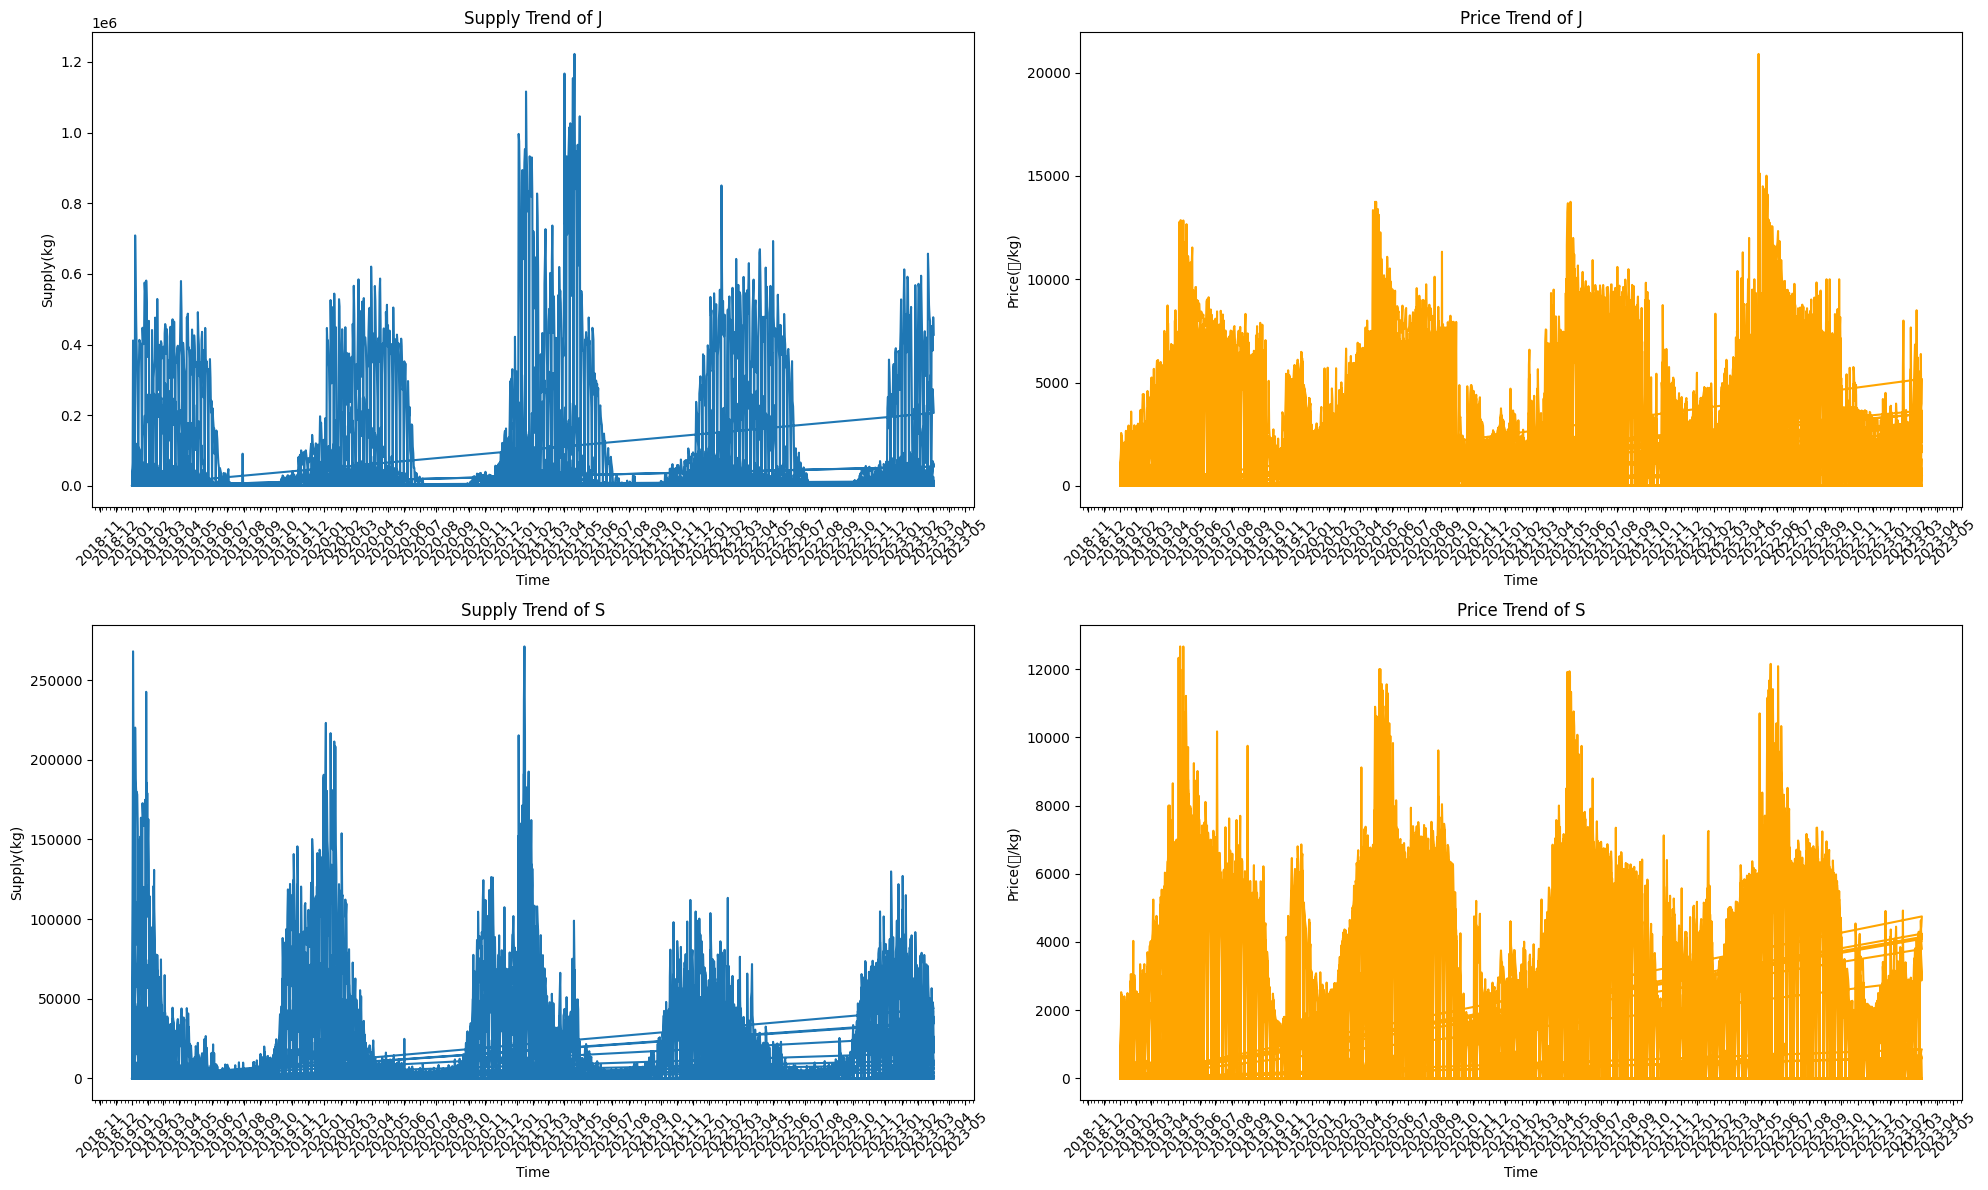

In [18]:
grouped_df = train_df.groupby('location')

# 그래프 그리기
fig, axes = plt.subplots(len(grouped_df), 2, figsize=(20, 6*len(grouped_df)))

for i, (location, group) in enumerate(grouped_df):
    # 왼쪽 그래프 (supply)
    axes[i, 0].plot(group['timestamp'], group['supply(kg)'])
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('Supply(kg)')
    axes[i, 0].set_title(f'Supply Trend of {location}')
    
    # 오른쪽 그래프 (price)
    axes[i, 1].plot(group['timestamp'], group['price(원/kg)'], color='orange')
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('Price(원/kg)')
    axes[i, 1].set_title(f'Price Trend of {location}')

    # x 축을 주 단위로 표시
    axes[i, 0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[i, 0].xaxis.set_minor_locator(mdates.WeekdayLocator())
    axes[i, 0].tick_params(axis='x', rotation=45)

    axes[i, 1].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[i, 1].xaxis.set_minor_locator(mdates.WeekdayLocator())
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<Axes: xlabel='item', ylabel='price(원/kg)'>

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


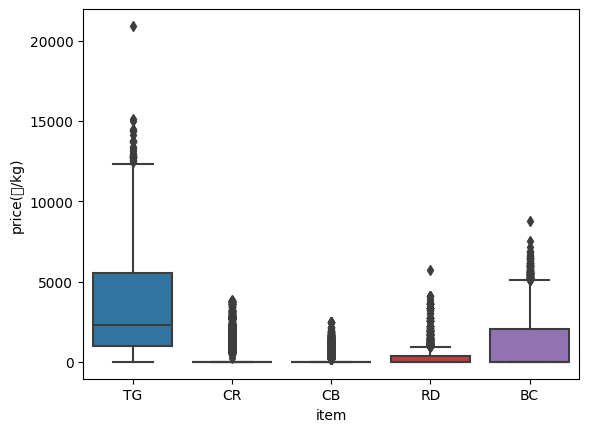

In [20]:
sns.boxplot(x = 'item', y = 'price(원/kg)', data = train_df)

<Axes: xlabel='corporation', ylabel='price(원/kg)'>

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


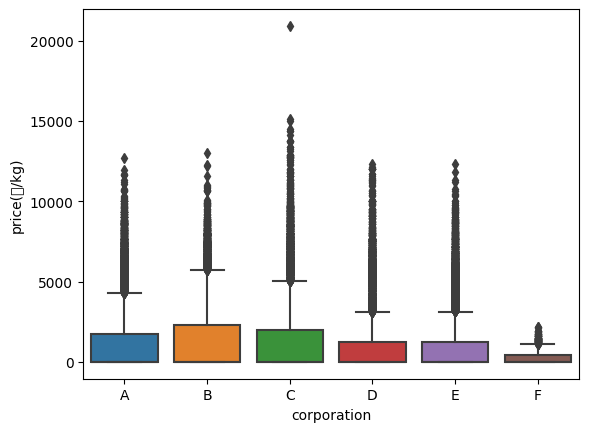

In [21]:
sns.boxplot(x = 'corporation', y = 'price(원/kg)', data = train_df)

<Axes: xlabel='location', ylabel='price(원/kg)'>

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


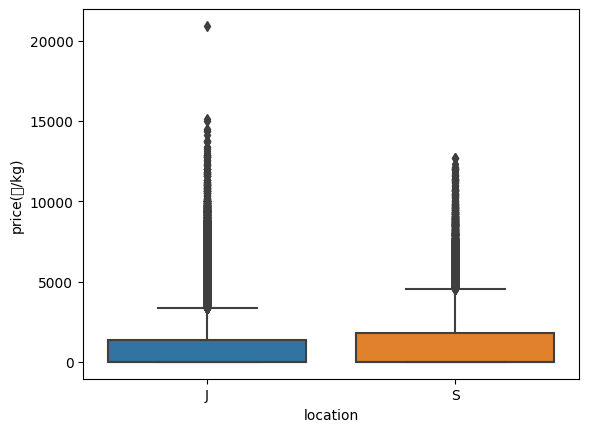

In [22]:
sns.boxplot(x = 'location', y = 'price(원/kg)', data = train_df)

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


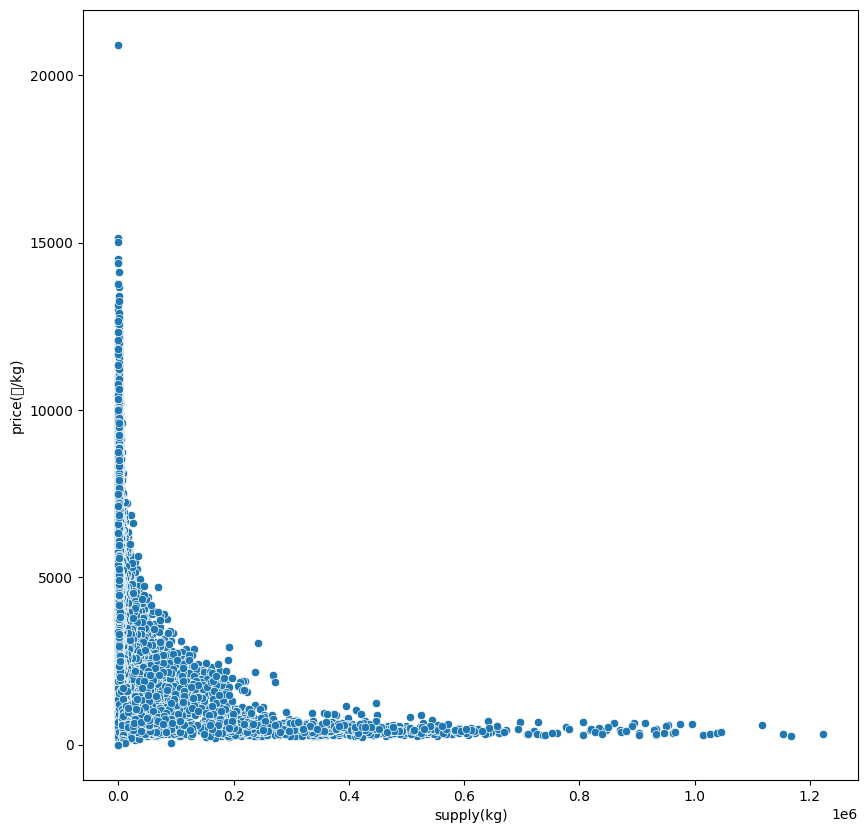

In [23]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = train_df, x = 'supply(kg)', y = 'price(원/kg)')

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


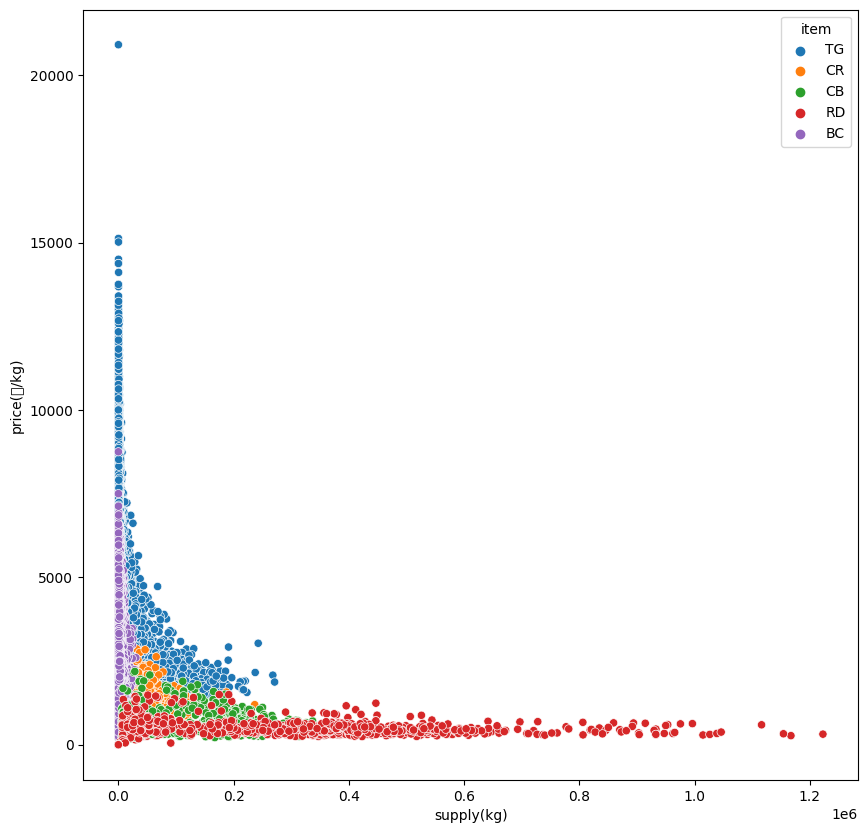

In [24]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = train_df, x = 'supply(kg)', y = 'price(원/kg)', hue = 'item')

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


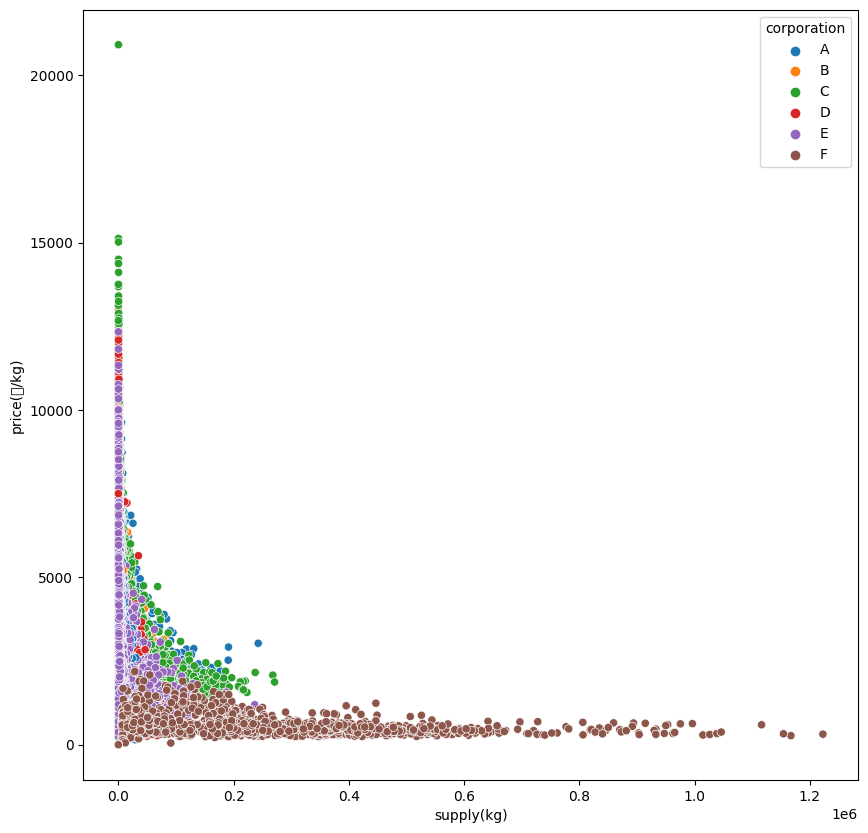

In [25]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = train_df, x = 'supply(kg)', y = 'price(원/kg)', hue = 'corporation')

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


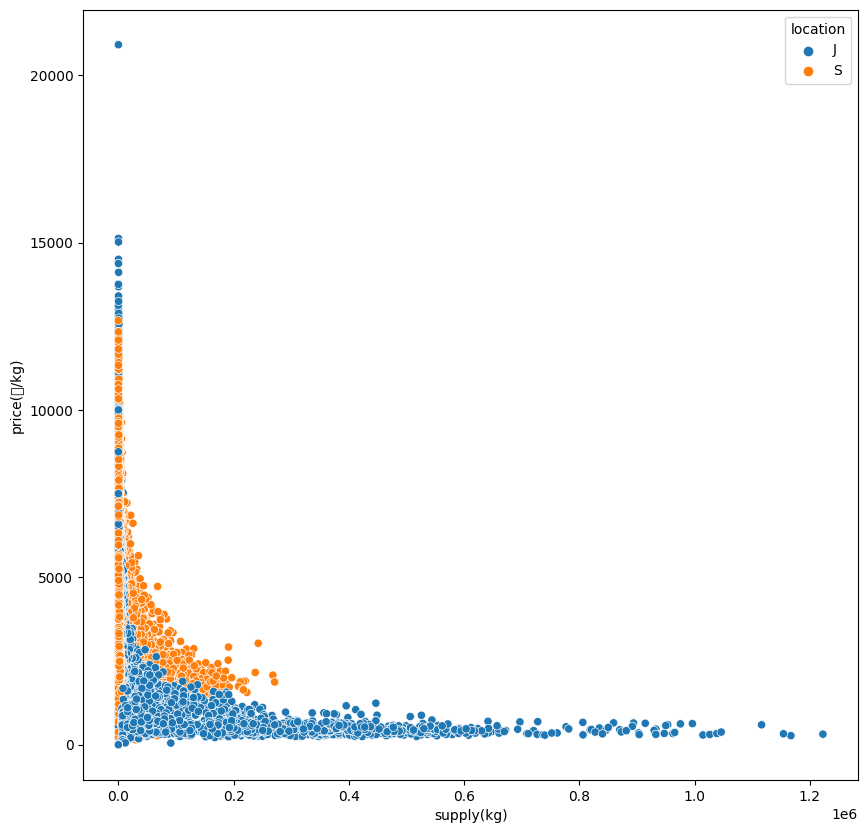

In [26]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = train_df, x = 'supply(kg)', y = 'price(원/kg)', hue = 'location')

In [27]:
train_df[['supply(kg)', 'price(원/kg)']].corr()

supply(kg)  price(원/kg)
supply(kg)     1.000000    -0.002297
price(원/kg)   -0.002297     1.000000

<Axes: xlabel='month', ylabel='price(원/kg)'>

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


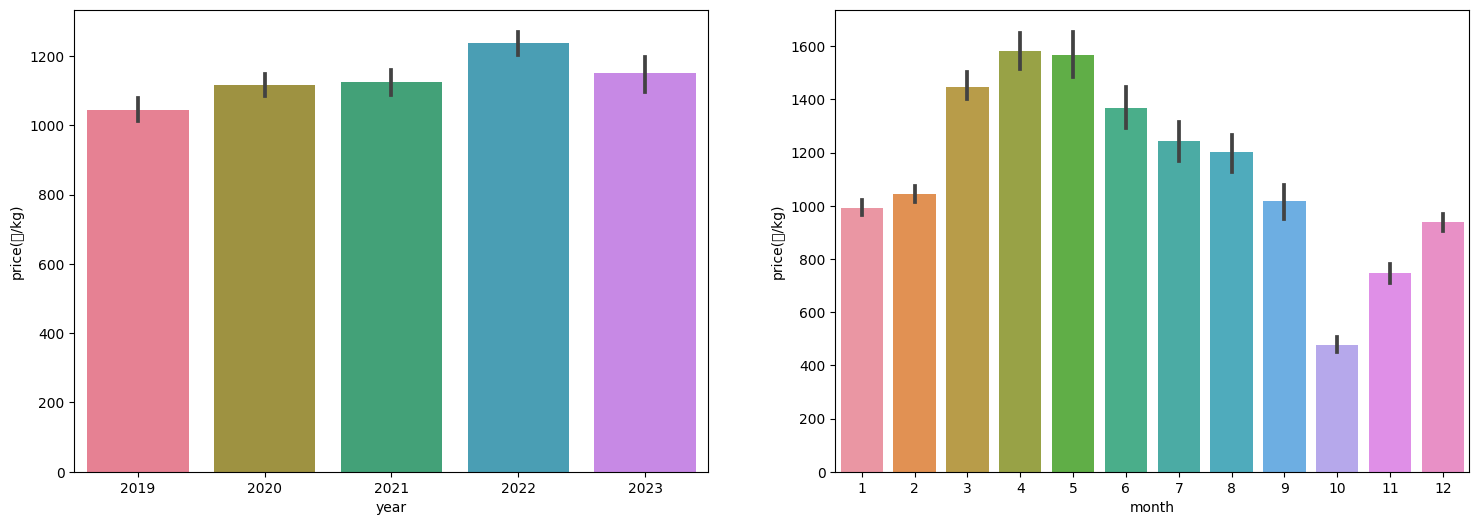

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data = train_df,x = 'year', y = 'price(원/kg)', ax = axes[0], palette = 'husl')
sns.barplot(data = train_df,x = 'month' , y ='price(원/kg)' ,ax = axes[1])  

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


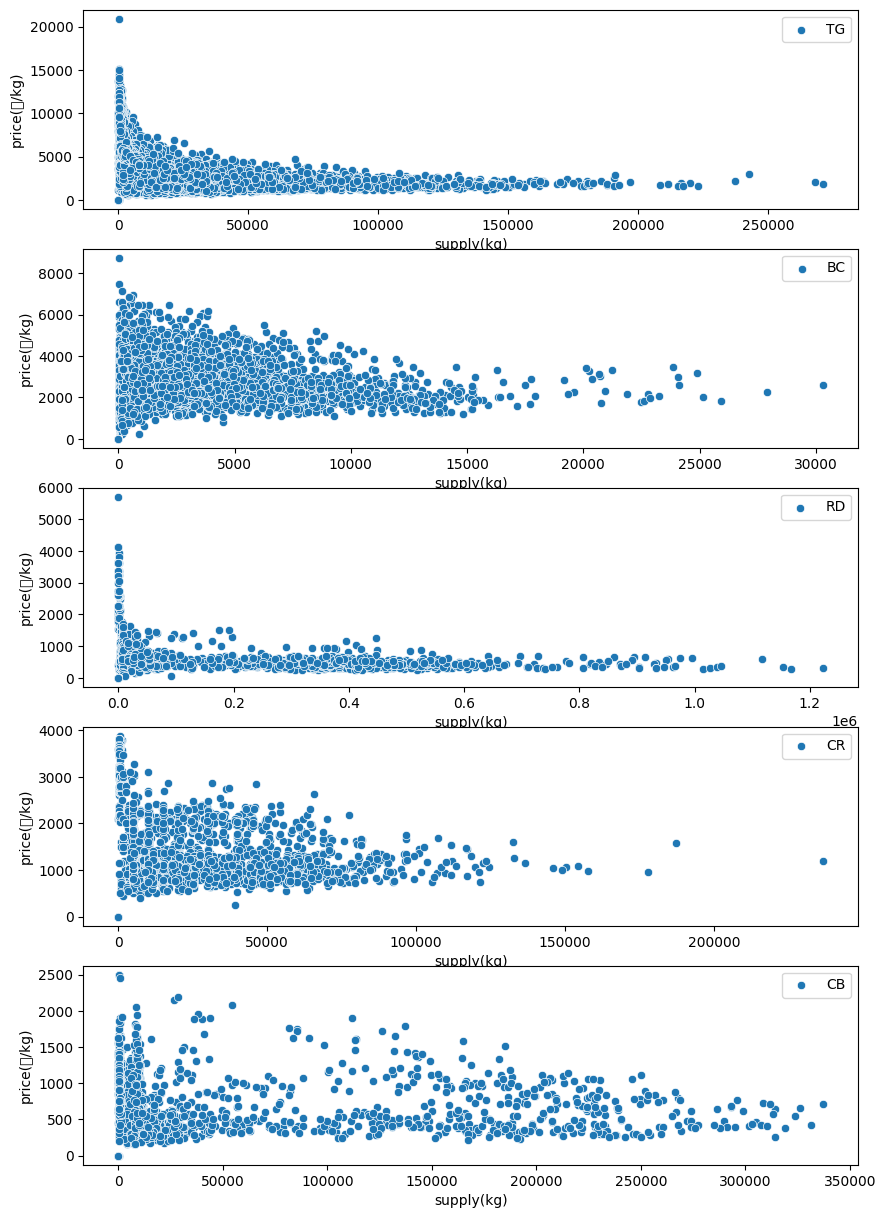

In [35]:
items = train_df['item'].value_counts().index.to_list()

fig, axes = plt.subplots(5, 1, figsize = (10,15))
for i in range(len(items)):
    r = i % 5
    sns.scatterplot(data = train_df[train_df['item'] == items[i]], x = 'supply(kg)',y = 'price(원/kg)', ax = axes[r], label = items[i])

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


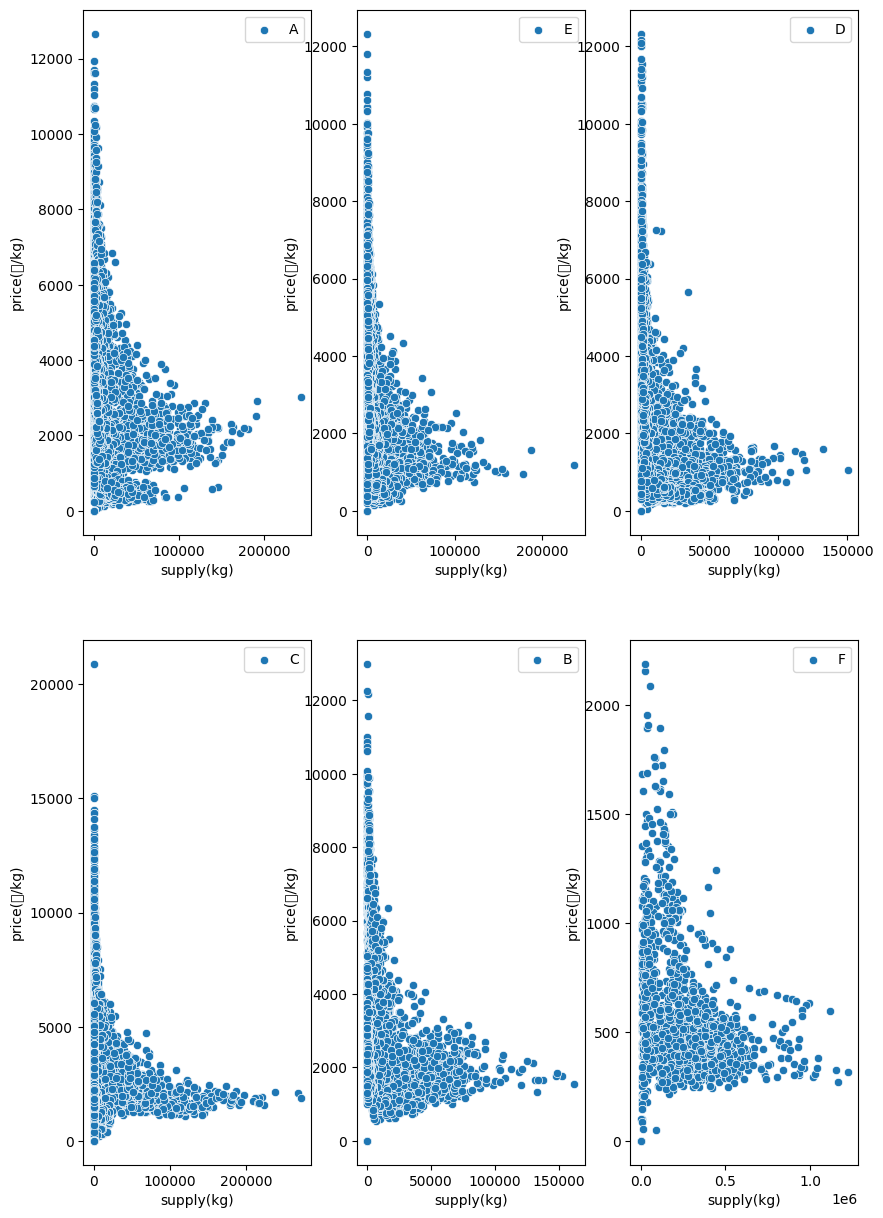

In [39]:
corp = train_df['corporation'].value_counts().index.to_list()

fig, axes = plt.subplots(2, 3, figsize = (10, 15))
for i in range(len(corp)):
    n = int(i / 3)
    r = i % 3
    sns.scatterplot(data = train_df[train_df['corporation'] == corp[i]], x = 'supply(kg)', y = 'price(원/kg)', ax = axes[n][r], label = corp[i])

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


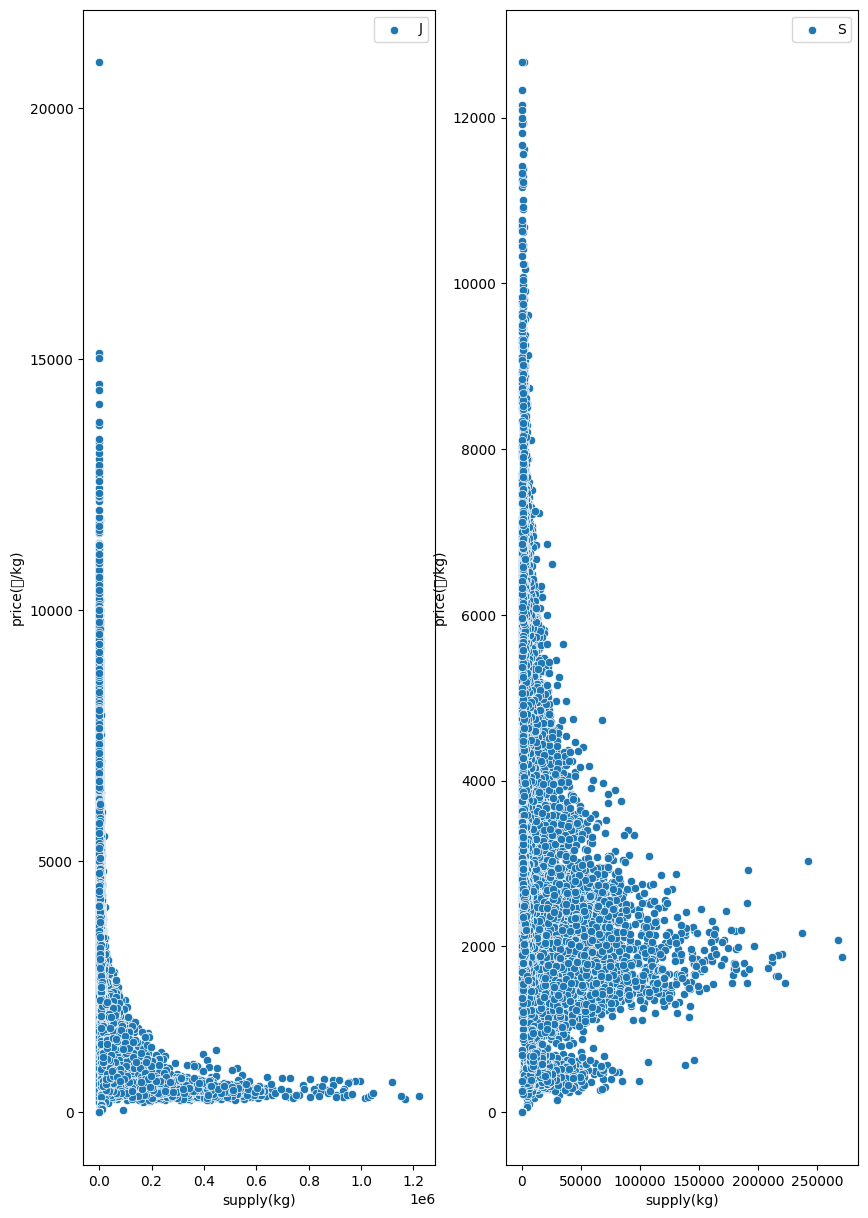

In [40]:
loc = train_df['location'].value_counts().index.to_list()

fig, axes = plt.subplots(1, 2, figsize = (10, 15))

sns.scatterplot(data = train_df[train_df['location'] == loc[0]], x = 'supply(kg)', y = 'price(원/kg)', label = loc[0], ax = axes[0])
sns.scatterplot(data = train_df[train_df['location'] == loc[1]], x = 'supply(kg)', y = 'price(원/kg)', label = loc[1], ax = axes[1])

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


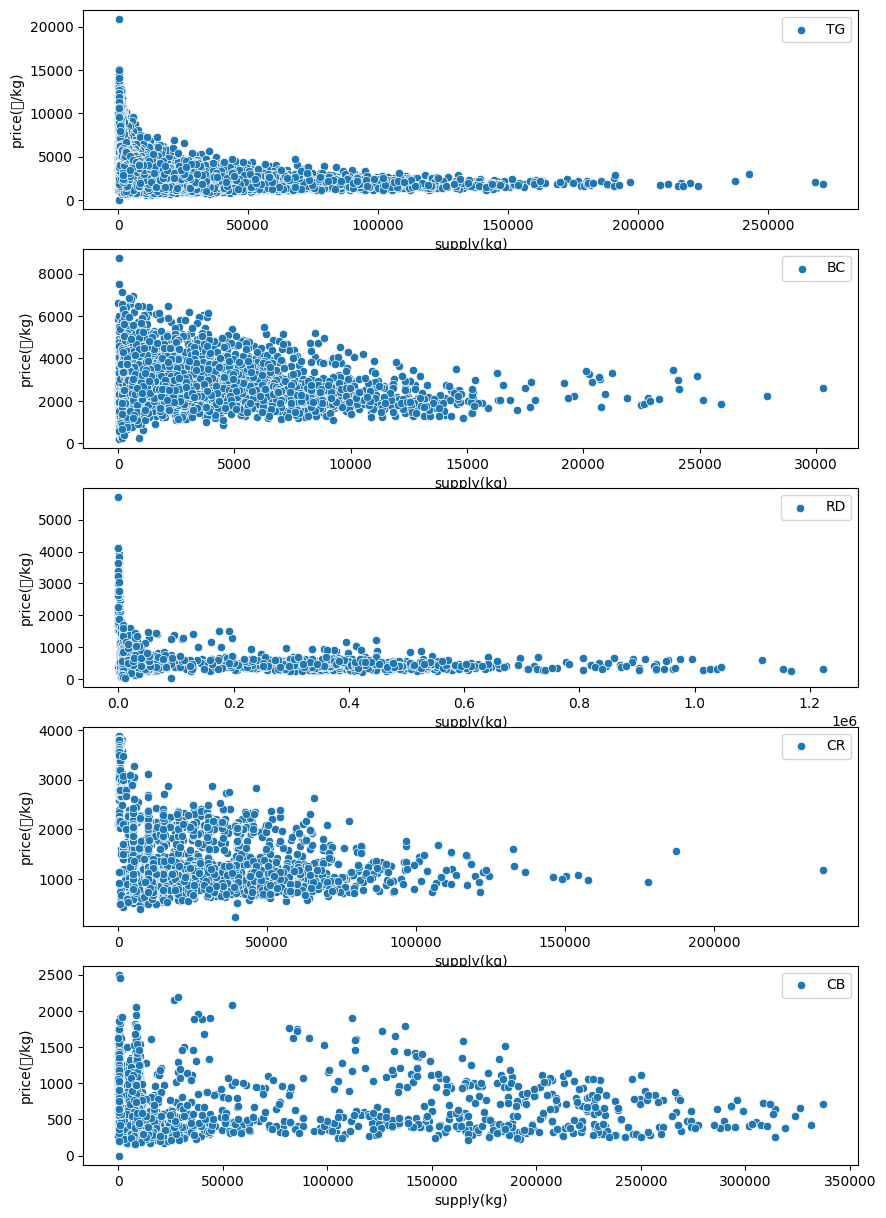

In [41]:
sup_notzero = train_df[train_df['supply(kg)'] != 0]

fig, axes = plt.subplots(5, 1, figsize = (10, 15))
for i in range(len(items)):
    r = i % 5
    sns.scatterplot(data = sup_notzero[sup_notzero['item'] == items[i]], x = 'supply(kg)', y = 'price(원/kg)', ax = axes[r], label = items[i])

C:\Users\dlwks\AppData\Local\Temp\ipykernel_19360\1681219286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sup_notzero['y-m']=sup_notzero['timestamp'].dt.strftime('%Y-%m')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-04'),
  Text(16, 0, '2020-05'),
  Text(17, 0, '2020-06'),
  Text(18, 0, '2020-07'),
  Text(19, 0, '2020-08'),
  Text(20, 0, '2020-09'),
  Text(21, 0, '2020-10'),
  Text(22, 0, '2020-11'),
  Text(23, 0, '2020-12'),
  Text(24, 0, '2021-01'),
  Text(25, 0, '2021-02'),
  Text(26, 0, '2021-03'),
  Text(27, 

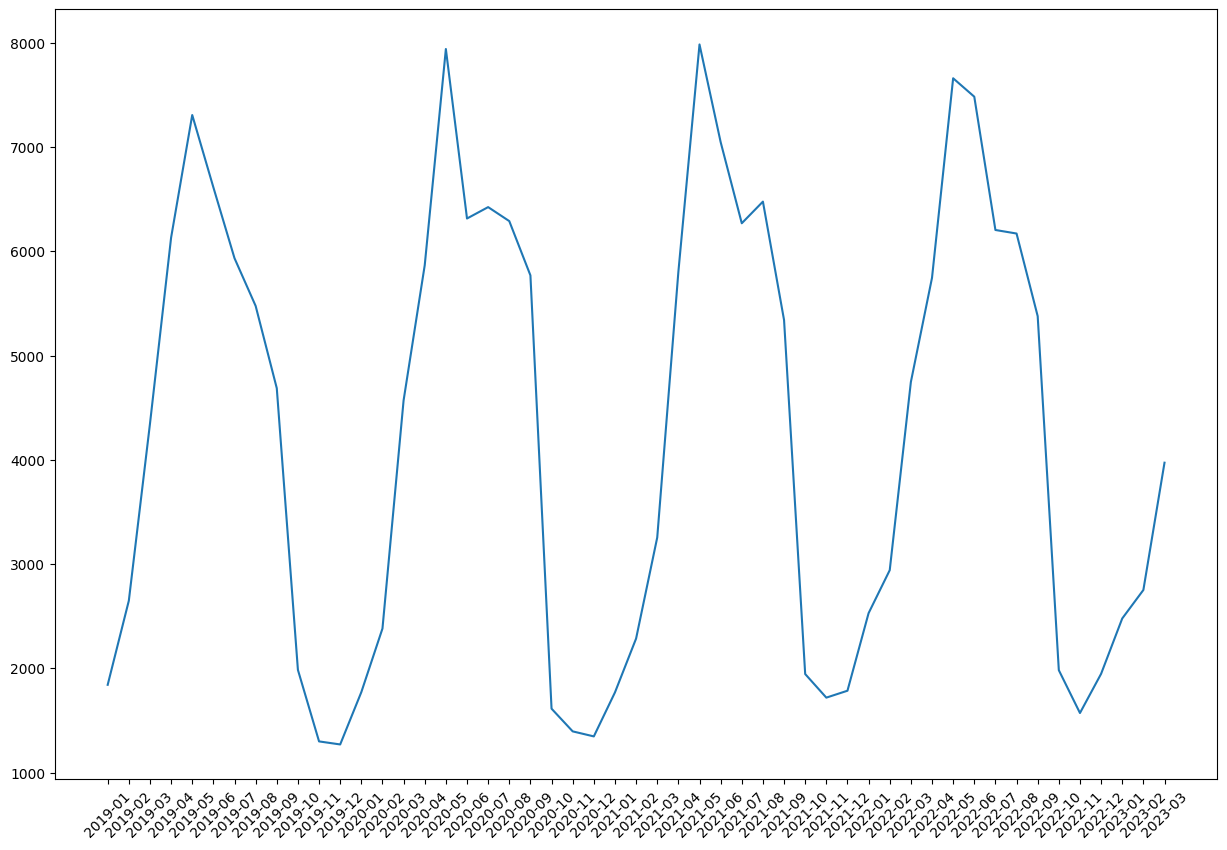

In [43]:
sup_notzero['y-m']=sup_notzero['timestamp'].dt.strftime('%Y-%m')
sup_notzero['y-m']

plt.figure(figsize = (15, 10))
plt.plot(sup_notzero[sup_notzero['item'] == 'TG'].groupby(['y-m'])['price(원/kg)'].mean())
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-10'),
  Text(7, 0, '2019-11'),
  Text(8, 0, '2019-12'),
  Text(9, 0, '2020-01'),
  Text(10, 0, '2020-02'),
  Text(11, 0, '2020-03'),
  Text(12, 0, '2020-04'),
  Text(13, 0, '2020-05'),
  Text(14, 0, '2020-10'),
  Text(15, 0, '2020-11'),
  Text(16, 0, '2020-12'),
  Text(17, 0, '2021-01'),
  Text(18, 0, '2021-02'),
  Text(19, 0, '2021-03'),
  Text(20, 0, '2021-04'),
  Text(21, 0, '2021-05'),
  Text(22, 0, '2021-10'),
  Text(23, 0, '2021-11'),
  Text(24, 0, '2021-12'),
  Text(25, 0, '2022-01'),
  Text(26, 0, '2022-02'),
  Text(27, 0, '2022-03'),
  Text(28, 0, '2022-04'),
  Text(29, 0, '2022-05'),
  Text(30, 0, '2022-10'

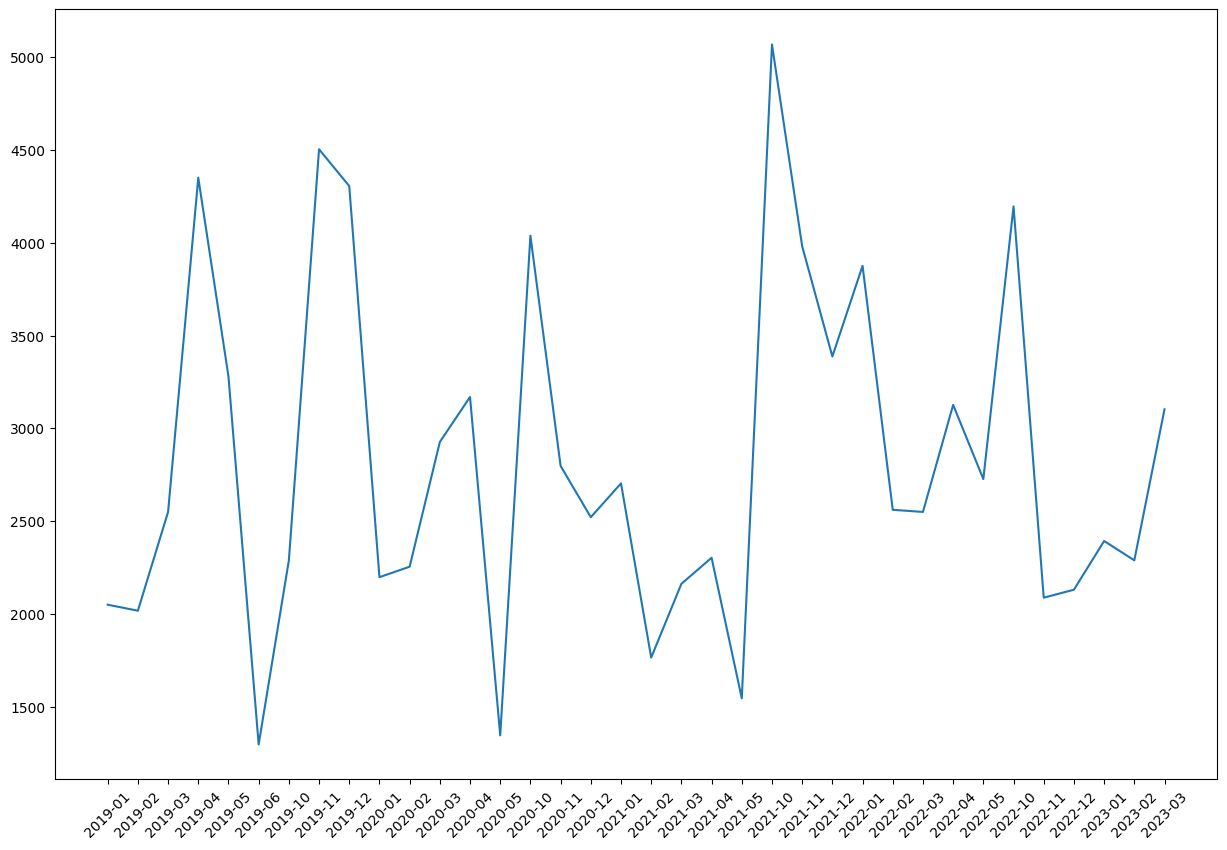

In [44]:
plt.figure(figsize = (15, 10))
plt.plot(sup_notzero[sup_notzero['item'] == 'BC'].groupby(['y-m'])['price(원/kg)'].mean())
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-12'),
  Text(9, 0, '2020-01'),
  Text(10, 0, '2020-02'),
  Text(11, 0, '2020-03'),
  Text(12, 0, '2020-04'),
  Text(13, 0, '2020-05'),
  Text(14, 0, '2020-06'),
  Text(15, 0, '2020-07'),
  Text(16, 0, '2020-08'),
  Text(17, 0, '2020-11'),
  Text(18, 0, '2020-12'),
  Text(19, 0, '2021-01'),
  Text(20, 0, '2021-02'),
  Text(21, 0, '2021-03'),
  Text(22, 0, '2021-04'),
  Text(23, 0, '2021-05'),
  Text(24, 0, '2021-06'),
  Text(25, 0, '2021-07'),
  Text(26, 0, '2021-08'),
  Text(27, 0, '2021-09'),
  Text(28, 0, '2021-1

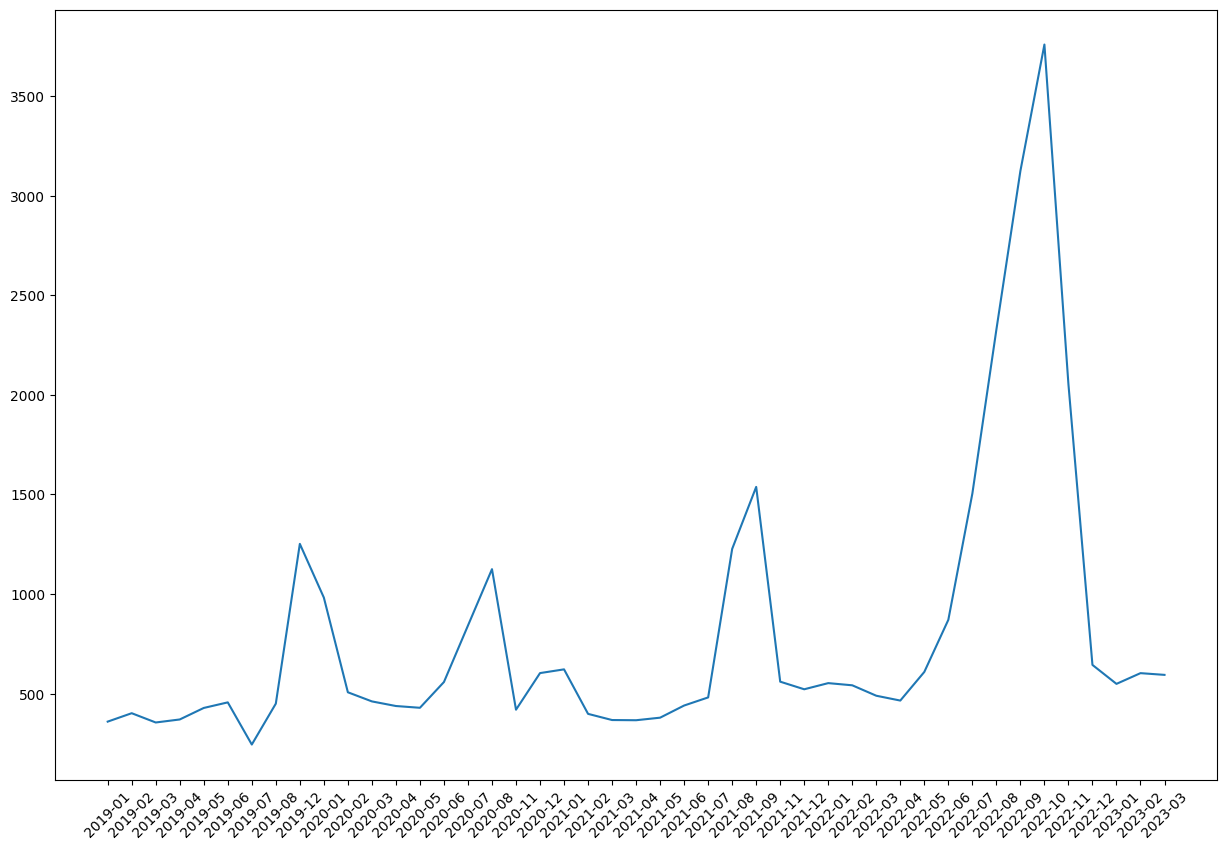

In [45]:
plt.figure(figsize = (15, 10))
plt.plot(sup_notzero[sup_notzero['item'] == 'RD'].groupby(['y-m'])['price(원/kg)'].mean())
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-11'),
  Text(7, 0, '2019-12'),
  Text(8, 0, '2020-01'),
  Text(9, 0, '2020-02'),
  Text(10, 0, '2020-03'),
  Text(11, 0, '2020-04'),
  Text(12, 0, '2020-05'),
  Text(13, 0, '2020-06'),
  Text(14, 0, '2020-11'),
  Text(15, 0, '2020-12'),
  Text(16, 0, '2021-01'),
  Text(17, 0, '2021-02'),
  Text(18, 0, '2021-03'),
  Text(19, 0, '2021-04'),
  Text(20, 0, '2021-05'),
  Text(21, 0, '2021-06'),
  Text(22, 0, '2021-07'),
  Text(23, 0, '2021-08'),
  Text(24, 0, '2021-10'),
  Text(25, 0, '2021-11'),
  Text(26, 0, '2021-12'),
  Text(27, 0, '2022-01'),
  Text(28, 0, '2022-02'),
  Text(29, 0, '2022-03'),

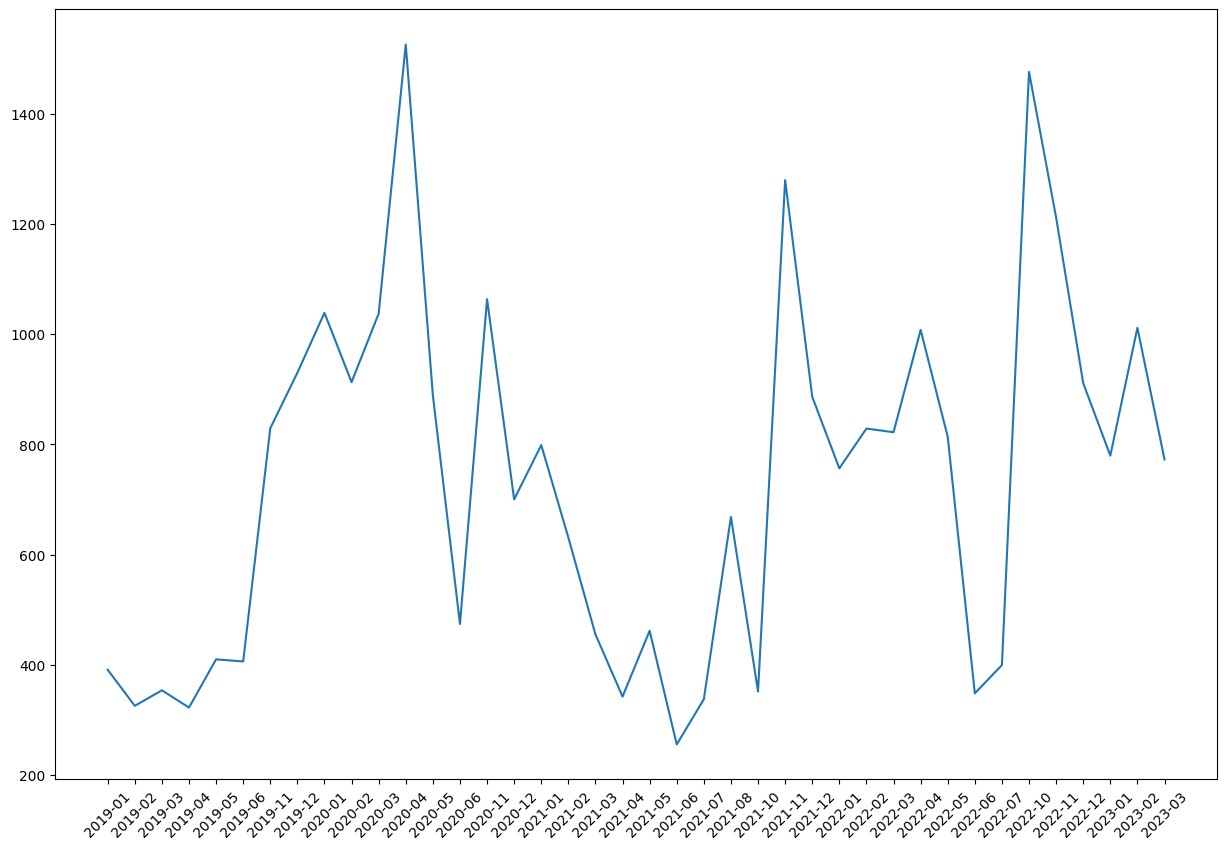

In [46]:
plt.figure(figsize = (15, 10))
plt.plot(sup_notzero[sup_notzero['item'] == 'CB'].groupby(['y-m'])['price(원/kg)'].mean())
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-12'),
  Text(6, 0, '2020-01'),
  Text(7, 0, '2020-02'),
  Text(8, 0, '2020-03'),
  Text(9, 0, '2020-04'),
  Text(10, 0, '2020-05'),
  Text(11, 0, '2020-11'),
  Text(12, 0, '2020-12'),
  Text(13, 0, '2021-01'),
  Text(14, 0, '2021-02'),
  Text(15, 0, '2021-03'),
  Text(16, 0, '2021-04'),
  Text(17, 0, '2021-05'),
  Text(18, 0, '2021-11'),
  Text(19, 0, '2021-12'),
  Text(20, 0, '2022-01'),
  Text(21, 0, '2022-02'),
  Text(22, 0, '2022-03'),
  Text(23, 0, '2022-04'),
  Text(24, 0, '2022-05'),
  Text(25, 0, '2022-06'),
  Text(26, 0, '2022-07'),
  Text(27, 0, '2022-08'),
  Text(28, 0, '2022-09'),
  Text(29, 0, '2022-10'),
  Text(30, 0, '2022-11'),
  T

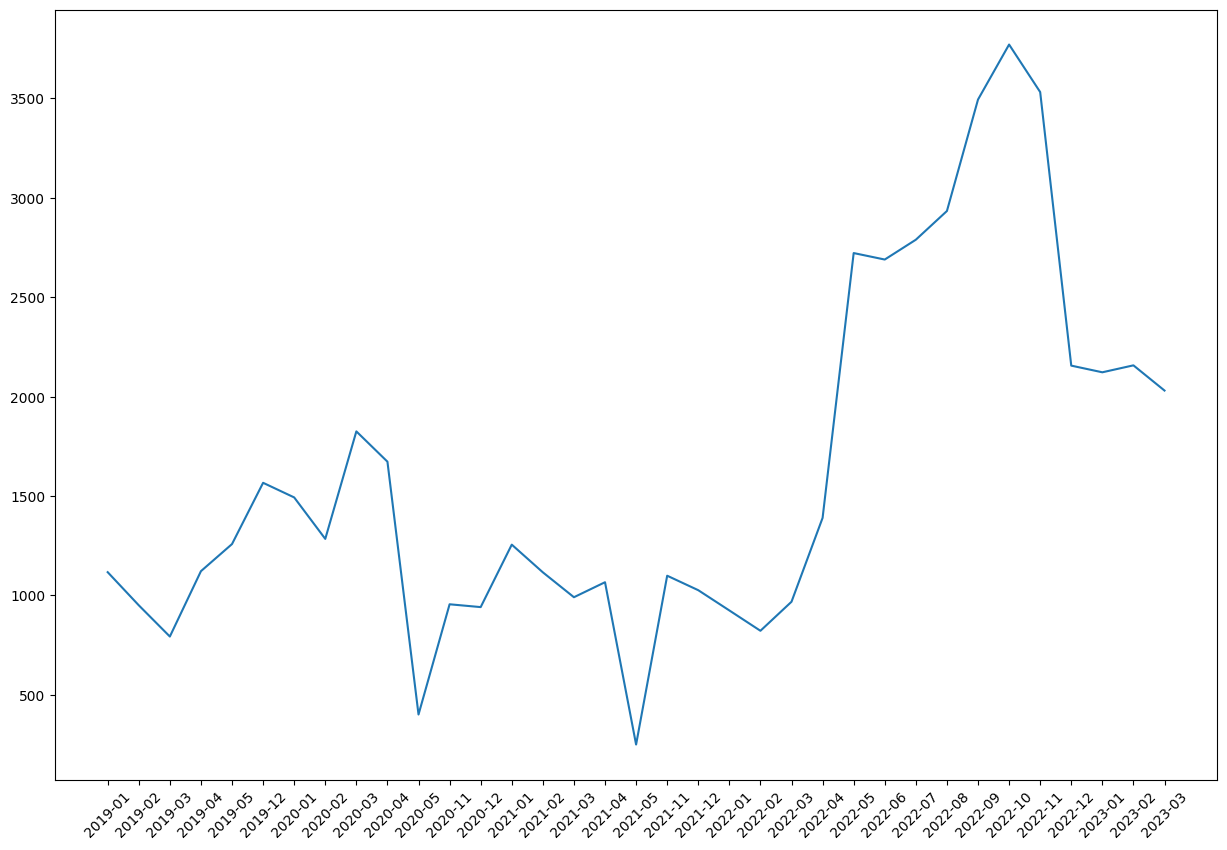

In [47]:
plt.figure(figsize = (15, 10))
plt.plot(sup_notzero[sup_notzero['item'] == 'CR'].groupby(['y-m'])['price(원/kg)'].mean())
plt.xticks(rotation = 45)

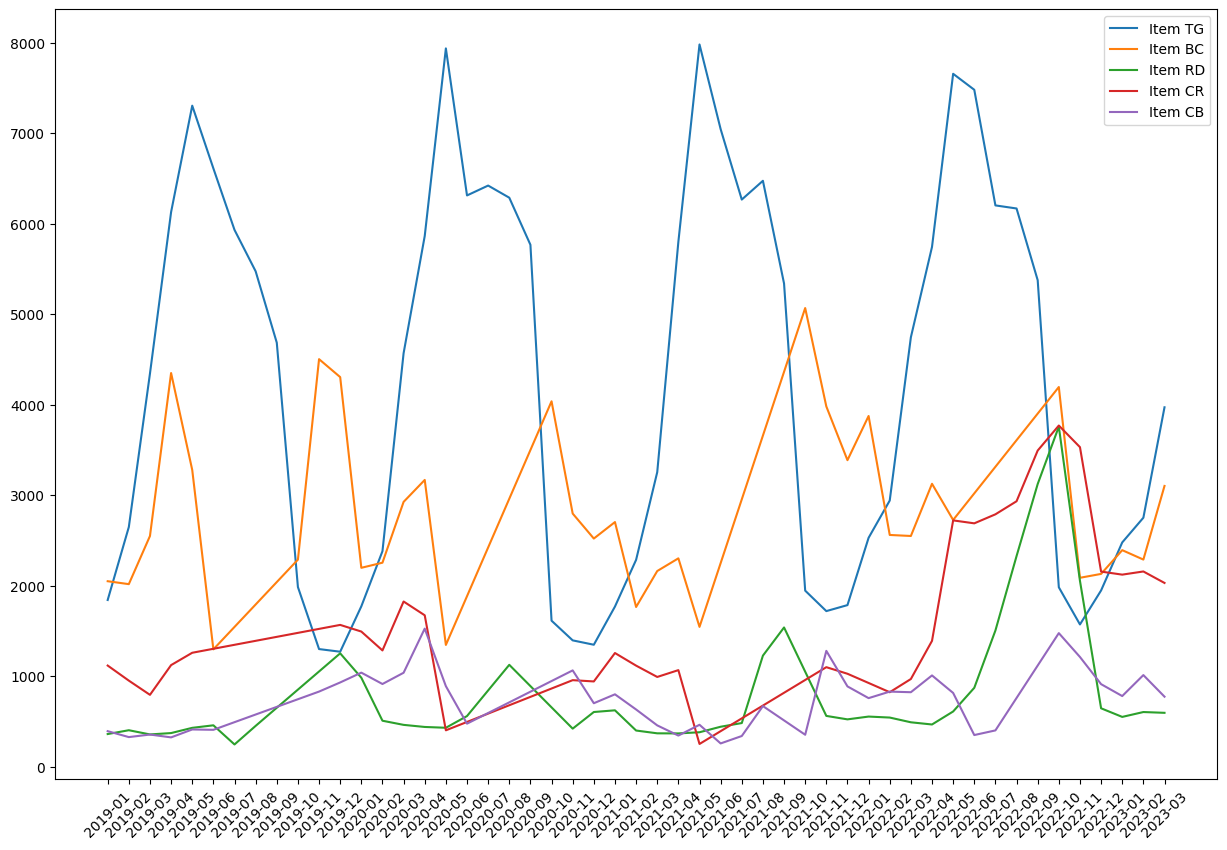

In [49]:
plt.figure(figsize = (15, 10))

for item in items:
    data = sup_notzero[sup_notzero['item'] == item].groupby(['y-m'])['price(원/kg)'].mean()
    plt.plot(data, label=f'Item {item}')
    plt.xticks(rotation=45)

plt.legend()
plt.show()

In [53]:
train_df['holiday'].value_counts()

train_df['holiday'] = train_df['holiday'].astype(str)
test_df['holiday'] = test_df['holiday'].astype(str)

<Axes: xlabel='location', ylabel='price(원/kg)'>

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


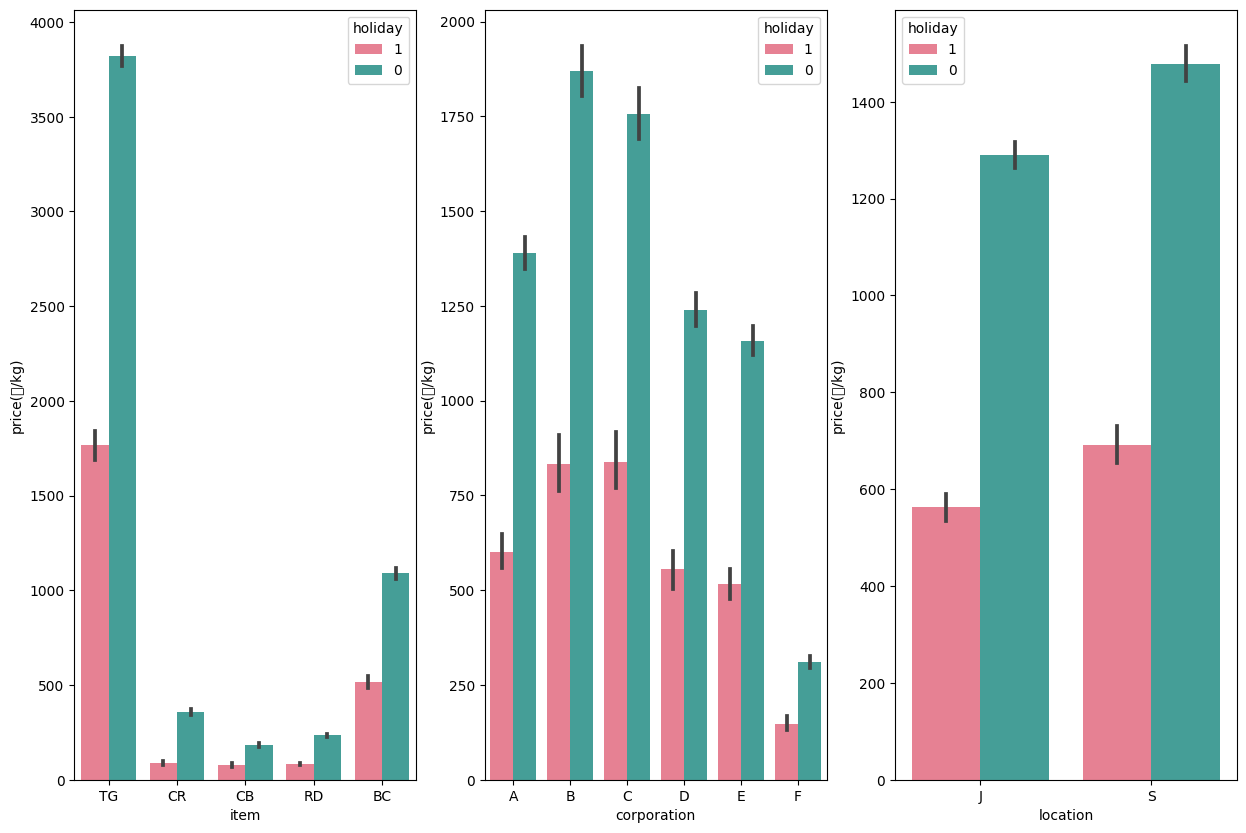

In [54]:
fig, axes = plt.subplots(1, 3, figsize = (15, 10))

sns.barplot(data = train_df, x = 'item', y = 'price(원/kg)', hue = 'holiday', ax = axes[0], palette = 'husl')
sns.barplot(data = train_df, x = 'corporation', y = 'price(원/kg)', hue = 'holiday', ax = axes[1], palette = 'husl')
sns.barplot(data = train_df, x = 'location', y = 'price(원/kg)', hue = 'holiday', ax = axes[2], palette = 'husl')